In [1]:
import numpy as np
import scipy
from scipy.ndimage import gaussian_filter1d
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp
import change_point_post_analysis as cppa
import place_field_analysis as pf
import pingouin as pg
import trial_correlates as tc
import tqdm
import misc

import switch_analysis_one_session as saos
reload(saos)

reload(misc)
import nmf_sweep_error as nse
from collections import OrderedDict

67 sessions!
67 sessions!
<module 'sys' (built-in)>


In [67]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 35

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



In [2]:
mpl.rcParams['image.cmap'] = 'Greys'
%matplotlib inline

In [3]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/cosyne'

db_sorted = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
data_dir_full = db_sorted['data_dir_full'][0]

In [5]:
reload(saos)

67 sessions!


<module 'switch_analysis_one_session' from '/mnt/home/szheng/projects/nmf_analysis/scripts/switch_analysis_one_session.py'>

# load switch res all sessions

In [13]:
%%time

data_dir_and_sess=list(db_sorted[['data_dir_full','animal_name.1','sess_name']].itertuples(index=False,name=None))
res_to_save_data_detection_l = OrderedDict()
save_fn = 'shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p'#'shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean.p'
# for ddf, sess in data_dir_and_sess:
for ddf,ani, sess in data_dir_and_sess:
    res_to_save_data_detection_l[(ani,sess)] = saos.switch_analysis_one_session(ddf,place_field_res=None,force_reload=False,nrepeats=1000,dosave=False,save_fn=save_fn,load_only=True)
    
pickle.dump(res_to_save_data_detection_l, open(os.path.join('/mnt/home/szheng/ceph/place_variability/data','switch_res_allromsess_highrepeats_swmag0dot4.p'),'wb'))

plt.close('all')

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26

/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201206/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200923/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200720/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201121/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201001/py

In [4]:
res_to_save_data_detection_l=pickle.load(open(os.path.join('/mnt/home/szheng/ceph/place_variability/data','switch_res_allromsess_highrepeats_swmag0dot4.p'),'rb'))
plt.close('all')
sess_selected = db_sorted.loc[db_sorted['n_pyr_putative'] >= 50,'sess_name']
switch_detection_res_allsess = cppa.reshape_switch_detection_result_all_sess(res_to_save_data_detection_l,sess_selected)

/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py:37: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]
/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py:37: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_re

In [360]:
switch_detection_res_allsess_resid = saos.load_switch_analysis_res_allsess(save_fn_one='resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p'
    ,force_reload=False,dosave=True,load_only=False,n_pyr_thresh=50)




/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/switch_analysis/resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/switch_analysis/resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/switch_analysis/resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/switch_analysis/resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exist

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201001/py_data/switch_analysis/resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200717/py_data/switch_analysis/resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200715/py_data/switch_analysis/resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201121/py_data/switch_analysis/resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200823/py_data/switch_analysis/resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200824/py_data/switch_analysis/resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading--

/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py:34: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]
/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py:34: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_re

saved at /mnt/home/szheng/ceph/place_variability/data/all_resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p


/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py:34: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]


In [23]:
reload(cppa)
sess_selected = db_sorted.loc[db_sorted['n_pyr_putative'] >= 50,'sess_name']
switch_detection_res_allsess = cppa.reshape_switch_detection_result_all_sess(res_to_save_data_detection_l,sess_selected)



/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py:34: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]
/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py:34: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_re

In [65]:
sess_selected = db_sorted.loc[db_sorted['n_pyr_putative'] >= 0,'sess_name']
switch_detection_res_allsess_nofilter = cppa.reshape_switch_detection_result_all_sess(res_to_save_data_detection_l,sess_selected)


/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py:34: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]
/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py:34: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_re

In [6]:
db_sorted['data_dir_full'].loc['e15_13f1'].loc[0]

'/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117'

In [5]:
data_dir_full_l = [
    '/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913',
    '/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118',
    '/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212',
    '/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328',
    '/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211213',
    '/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211211'
]

In [16]:
sess_name_l = [
    'e13_26m1_210913',
    'e15_13f1_220118',
    'e13_16f1_210328',
    'e16_3m2_211213',
    'e16_3m1_210119'
]

In [357]:
reload(saos)

67 sessions!


<module 'switch_analysis_one_session' from '/mnt/home/szheng/projects/nmf_analysis/scripts/switch_analysis_one_session.py'>

In [17]:
import nmf_sweep_error as nse

In [18]:
sw_res_l = {}
pf_res_l = {}
nmf_err_l = {}
for sess_name in sess_name_l:
    row=db.loc[db['sess_name']==sess_name].iloc[0]
    ani=row['animal_name.1']
    data_dir_full = row['data_dir_full']
    
    sw_res = saos.switch_analysis_one_session(data_dir_full,save_fn='shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p',force_reload=False)
    sw_res_l[(ani,sess_name)] = sw_res
    pf_res = pf.field_detection_both_avg_trial_wrapper(data_dir_full, dosave=True,force_reload=False,nbins = 100, 
                                        save_fn = 'place_field_avg_and_trial_vthresh.p', 
                                        shuffle_fn='fr_map_null_trialtype_vthresh.p',
                                        smth_in_bin=2.5, speed_thresh=1.,speed_key='v',load_only=True
                                        )
    pf_res_l[(ani,sess_name)] = pf_res
    nmf_err=nse.nmf_sweep_error(data_dir_full,detection='avg',fr_key='fr_mean',force_reload=False,save_dir_name='nmf_error',dosave=False,save_fn='nmf_sweep_error_shuffle.p')
    nmf_err_l[(ani,sess_name)] = nmf_err
    
plt.close('all')

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/nmf_error/nmf_sweep_error_shuffle.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/nmf_error/nmf_sweep_error_shuffle.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/switch_analysis/shuffle_detection_vth

# plot multiple coswitching examples and nonexamples

In [24]:
reload(cppa)

reload(ph)

<module 'change_point_post_analysis' from '/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py'>

In [14]:
sns.set(font_scale=2)
sns.set_style("whitegrid", {'axes.grid' : False})

In [20]:
def get_highest_shuffle(X_pwc,X_raw, changes_df,trial_index,onoff=1,n_shuffle=100,alpha=0.05,do_bonf=True):
    nfields,ntrials = X_pwc.shape
    if do_bonf:
        alpha = alpha / 2 / (ntrials-1)
    else:
        alpha = alpha / 2
    new_start_inds=np.random.randint(ntrials-1,size=(n_shuffle,nfields)) # sample independently for each field the starting point in the shift
    changes_df_shuffled_l = cpa.gen_circular_shuffle(changes_df,nrepeats=n_shuffle,new_start_inds=new_start_inds)
#     n_sw = np.array([(cds==onoff).sum(axis=0).max() for cds in changes_df_shuffled_l])
    n_sw_shuffle = np.array([(cds.loc[:,trial_index]==onoff).sum(axis=0) for cds in changes_df_shuffled_l])
    rank_ind=int(np.ceil(len(n_sw_shuffle) * (1-alpha)))-1
    ind_n_sw_shuffle = np.argsort(n_sw_shuffle)[rank_ind]
#     import pdb
#     pdb.set_trace()

    
    X_pwc_shuffled_l = cpa.gen_circular_shuffle(X_pwc,nrepeats=n_shuffle,new_start_inds=new_start_inds)
    X_raw_shuffled_l =cpa.gen_circular_shuffle(X_raw,nrepeats=n_shuffle,new_start_inds=new_start_inds)
    
    X_pwc_shuffled = X_pwc_shuffled_l[ind_n_sw_shuffle]
    X_raw_shuffled = X_raw_shuffled_l[ind_n_sw_shuffle]
    changes_df_shuffled = changes_df_shuffled_l[ind_n_sw_shuffle]
    
#     trial_index = (changes_df_shuffled==onoff).sum(axis=0).idxmax()
    
    return X_pwc_shuffled,X_raw_shuffled,changes_df_shuffled,n_sw_shuffle,alpha #,trial_index
    

In [21]:
import numpy as np

In [77]:
reload(cpa)
reload(ph)

<module 'plot_helper' from '/mnt/home/szheng/projects/util_code/plot_helper.py'>

In [115]:
from matplotlib.ticker import MaxNLocator
def shuffle_test_pair_share_onoff_and_plot(changes_one,plot_key='on',nrepeats=100,alpha=0.025,fig=None,ax=None,lw=4):
    res,share_shuffle = cpa.shuffle_test_pair_share_onoff(changes_one,nrepeats=nrepeats,alpha=alpha)
    fig,ax=ph.plot_shuffle_data_dist_with_thresh(share_shuffle[plot_key],res.loc['count',plot_key],fig=fig,ax=ax,lw=lw)
    _=ax.set(title=f'Field Pairs Sharing {plot_key.upper()} Trials',xlabel='Num. Pairs', ylabel='Count')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    return fig,ax
    

/tmp/ipykernel_2702617/1135557463.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_one = switch_detection_res_allsess['avg']['changes_df'].loc[(*ani_sess,*sw_ind),:].dropna(axis=1)


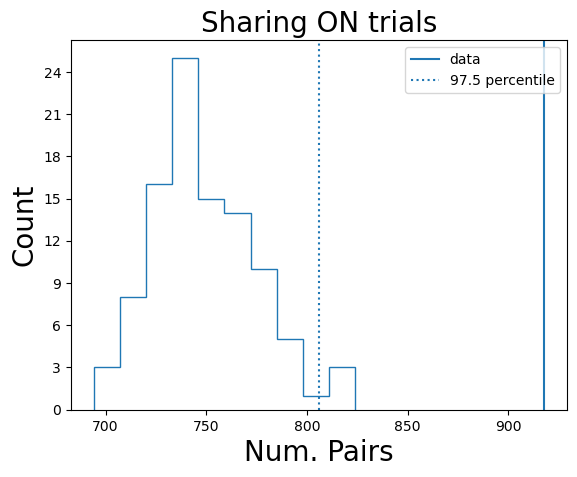

In [28]:
ani_sess = ('e13_26m1','e13_26m1_210913')
sw_ind = (0,0,0.3,'switch_magnitude',0.4)
changes_one = switch_detection_res_allsess['avg']['changes_df'].loc[(*ani_sess,*sw_ind),:].dropna(axis=1)
fig,ax = shuffle_test_pair_share_onoff_and_plot(changes_one,plot_key='on',nrepeats=100)

In [64]:
sns.set(font_scale=3.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.reset_orig()

In [135]:
reload(ph)
SMALL_SIZE = 30
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



In [136]:
reload(cppa)
def coswitching_plot_main(pf_res_l,sw_res_l,switch_detection_res_allsess,onoff = 1,dosave=False,n_shuffle = 10000,nrepeats_pairwise=1000):
    detection = 'avg'
    pen = 0.3
    sw_def = 'switch_magnitude'
    threshold = 0.4
    sw_ind = (slice(None),slice(None),pen,sw_def,threshold)
    # onoff = 1
    onoff_str={1:'on',-1:'off'}[onoff]
    
    do_sort = True
    lw = 15
    ticklabelfontsize = 35
    
    per_ani_sig_trial_hist_splittrialtype = cppa.get_per_ani_sig_trial_hist(switch_detection_res_allsess,detection=detection,sw_ind=(pen,sw_def,threshold),onoff_str=onoff_str,split_trialtype=True)
    

    for (ani,sess) in pf_res_l.keys():
        pf_res = pf_res_l[ani,sess]
        sw_res = sw_res_l[ani,sess]
#     for ii,(pf_res, sw_res) in enumerate(zip(pf_res_l,sw_res_l)):

#         sess = data_dir_full_l[ii].split('/')[-1]
#         ani = data_dir_full_l[ii].split('/')[-2]
        
        sigpos = sw_res[detection]['sig'].loc[sw_ind] * (sw_res[detection]['cdf'].loc[sw_ind]>0.95)
        
        changes = sw_res[detection]['changes_df'].loc[sw_ind]


        # select trialtype, trial_index
        if sigpos[onoff_str].any().any():
            sig=True
            rawinds=np.nonzero(sigpos[onoff_str].values==True) # avoid nan!!!
            trialtype=sigpos[onoff_str].index[rawinds[0][0]]
            trial_index = sigpos[onoff_str].columns[rawinds[1][0]]
        else:
            sig=False
            trialtype = (0,0)
            trial_index = ((changes.loc[trialtype]==onoff).sum(axis=0)).idxmax()

        X_pwc=sw_res[detection]['X'][0.3][trialtype]
        X_raw = sw_res[detection]['X']['raw'][trialtype]
        all_fields=pf_res[detection]['all_fields'][trialtype]
        changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)

        all_field_selected_coms, field_coms, nonfield_coms_selected = cppa.get_coswitching_examples_nonexamples_inds(X_raw,X_pwc, all_fields, changes_df, trial_index,onoff=onoff,do_sort=do_sort)
        n_sw_data = len(field_coms)
        height_original = len(all_field_selected_coms)

        ### SHUFFLE!!!
    #     nfields,ntrials = X_pwc.shape
    #     new_start_inds=np.random.randint(ntrials-1,size=(1,nfields)) # sample independently for each field the starting point in the shift
    #     changes_df_shuffled = cpa.gen_circular_shuffle(changes_df,nrepeats=1,new_start_inds=new_start_inds)[0]
    #     X_pwc_shuffled = cpa.gen_circular_shuffle(X_pwc,nrepeats=1,new_start_inds=new_start_inds)[0]
    #     X_raw_shuffled =cpa.gen_circular_shuffle(X_raw,nrepeats=1,new_start_inds=new_start_inds)[0]

        X_pwc_shuffled,X_raw_shuffled,changes_df_shuffled,n_sw_shuffle,alpha=get_highest_shuffle(X_pwc,X_raw, changes_df,trial_index,onoff=onoff,n_shuffle=n_shuffle,alpha=0.05,do_bonf=True)


        all_field_selected_coms_shuffled, field_coms_shuffled, nonfield_coms_selected_shuffled = cppa.get_coswitching_examples_nonexamples_inds(X_raw_shuffled,X_pwc_shuffled, all_fields, changes_df_shuffled, trial_index,onoff=onoff,do_sort=do_sort)


    #     height_shuffle = len(field_coms_shuffled)
        height_shuffle = len(all_field_selected_coms_shuffled)


        #### plot
    #     fig,axs = plt.subplots(1,4,gridspec_kw={'height_ratios':[height_original,height_original,height_original,height_shuffle]})
    #     fig,axs = plt.subplots(1,4)
        fig = plt.figure(figsize=(40,10))
        axs = fig.subplot_mosaic([
            [0,1,7,8],
            [0,1,7,8]
        ],
            gridspec_kw={"height_ratios":[height_shuffle,height_original-height_shuffle]}
        )
        axs_sub = [axs[i] for i in range(2)]



#         fig,_ = cppa.show_coswitching_examples_nonexamples_withcom(X_raw,X_pwc,all_fields,changes_df,trial_index,onoff=onoff,
#                                                                      all_field_selected_coms=all_field_selected_coms,field_coms=field_coms,nonfield_coms_selected=nonfield_coms_selected,
#                                                                      fig=fig,axs=axs_sub,do_sort=do_sort
#                                                                     )
        fig,_ = cppa.show_coswitching_examples_nonexamples(X_raw,X_pwc,all_fields,changes_df,trial_index,onoff=onoff,
                                                                     all_field_selected_coms=all_field_selected_coms,field_coms=field_coms,nonfield_coms_selected=nonfield_coms_selected,
                                                                     fig=fig,axs=axs_sub,do_sort=do_sort,lw=lw,
                                                                   ticklabelfontsize = ticklabelfontsize
                                                                    )

    
#         sns.heatmap(X_raw_shuffled.loc[field_coms_shuffled.index],cmap='Greys',ax=axs[3])
#         sns.heatmap(X_raw_shuffled.loc[all_field_selected_coms_shuffled.index],cmap='Greys',ax=axs[3])

#         yticks = [int(len(field_coms_shuffled)/2),len(field_coms)+int(len(nonfield_coms_selected_shuffled)/2)]
#         axs[3].set(ylabel='Shuffled Place Field',yticks=[],title=f"Raw FR Shuffled\n(N co-switch = {len(field_coms_shuffled)})",xlabel='Trial')
#         axs[3].vlines(trial_index,*axs[3].get_ylim(),linewidth=4,linestyle=':',color='C0')
#         axs[3].hlines(len(field_coms_shuffled),*axs[3].get_xlim(),linewidth=4,color='C1')
#         axs[4].axis('off')
        
#         axs[5]=cppa.plot_per_ani_sig_trial_hist_oneani(per_ani_sig_trial_hist_splittrialtype,ani,task_index=0,split_trialtype=True,ax=axs[5])
#         axs[6].axis('off')
        
        fig,ax = ph.plot_shuffle_data_dist_with_thresh(n_sw_shuffle,n_sw_data,fig=fig,ax=axs[7],alpha=alpha,lw=lw/2)
        _=ax.set(title=f'Co-switching Fields Per Trial',xlabel='Num. Fields', ylabel='Count')
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#         ax.legend(['Shuffle','Data','Alpha=0.05 Threshold'])
        
        fig,ax = shuffle_test_pair_share_onoff_and_plot(changes,plot_key=onoff_str,nrepeats=nrepeats_pairwise,ax=axs[8],fig=fig,alpha=0.025,lw=lw/2)
#         ax.legend(['Shuffle','Data','Alpha=0.05 Threshold'])
        plt.tight_layout()
        


        figfn = f'coswitching_{onoff_str}_ex_{sess}_sig_{sig}.pdf'
        if dosave:
            fig.savefig(os.path.join(figdir,figfn))
    

In [151]:
reload(cppa)

<module 'change_point_post_analysis' from '/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py'>

/tmp/ipykernel_56149/1030967376.py:45: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)
/tmp/ipykernel_56149/1030967376.py:45: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)
/tmp/ipykernel_56149/1030967376.py:45: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)
/tmp/ipykernel_56149/1030967376.py:45: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)
/tmp/ipykernel_56149/1030967376.py:45: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['chan

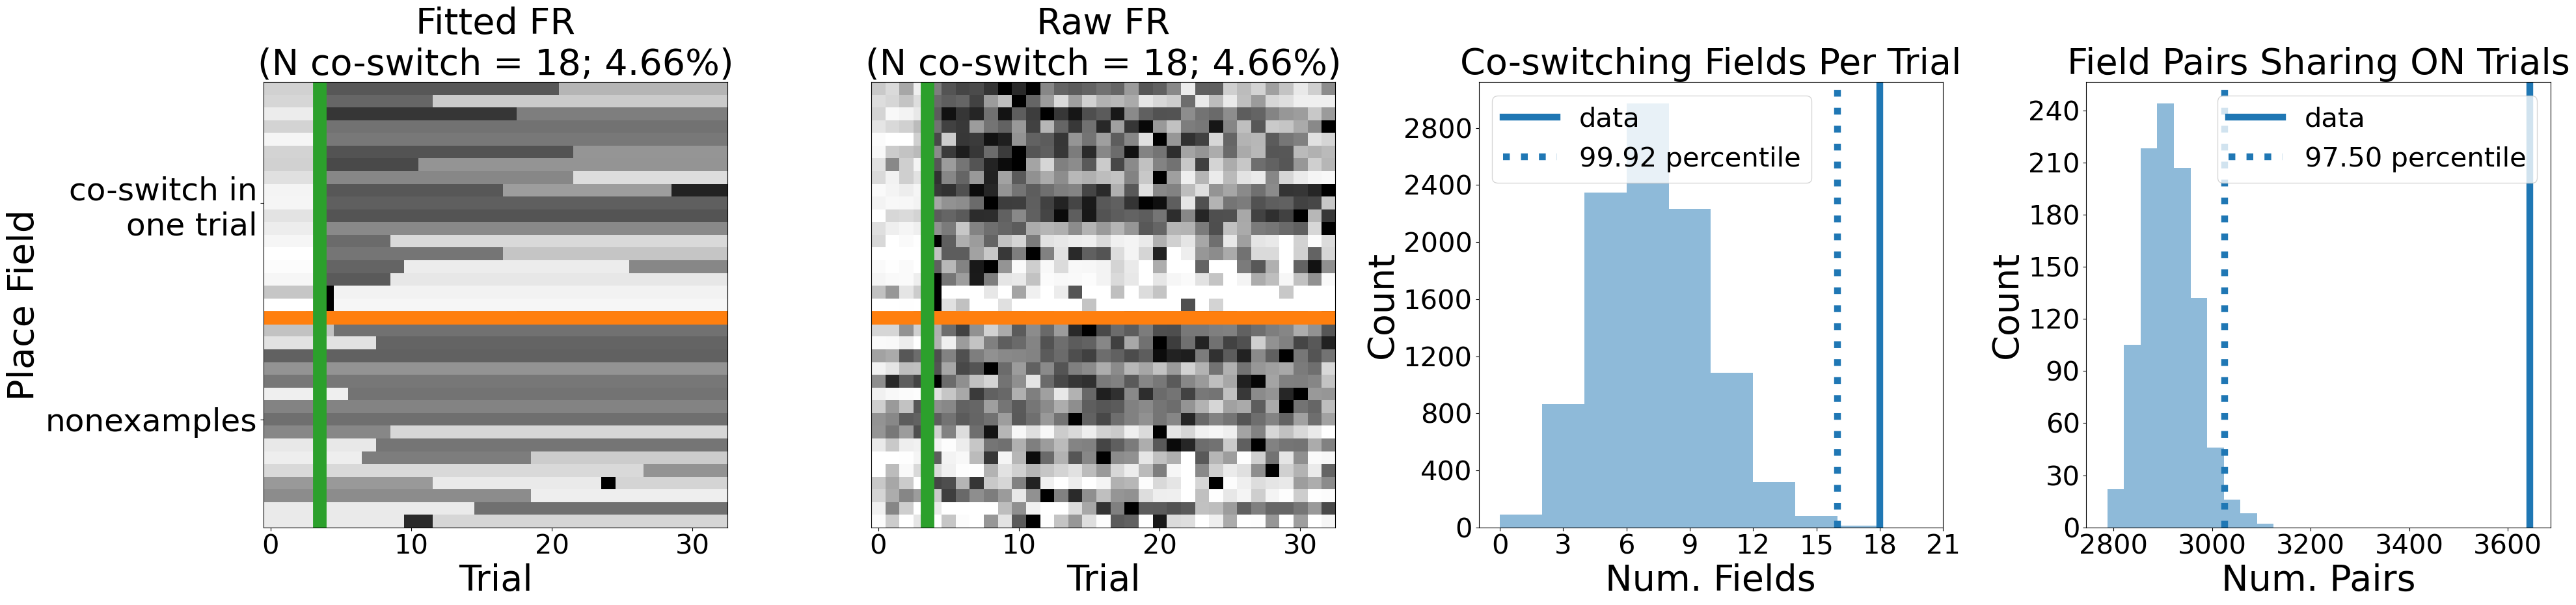

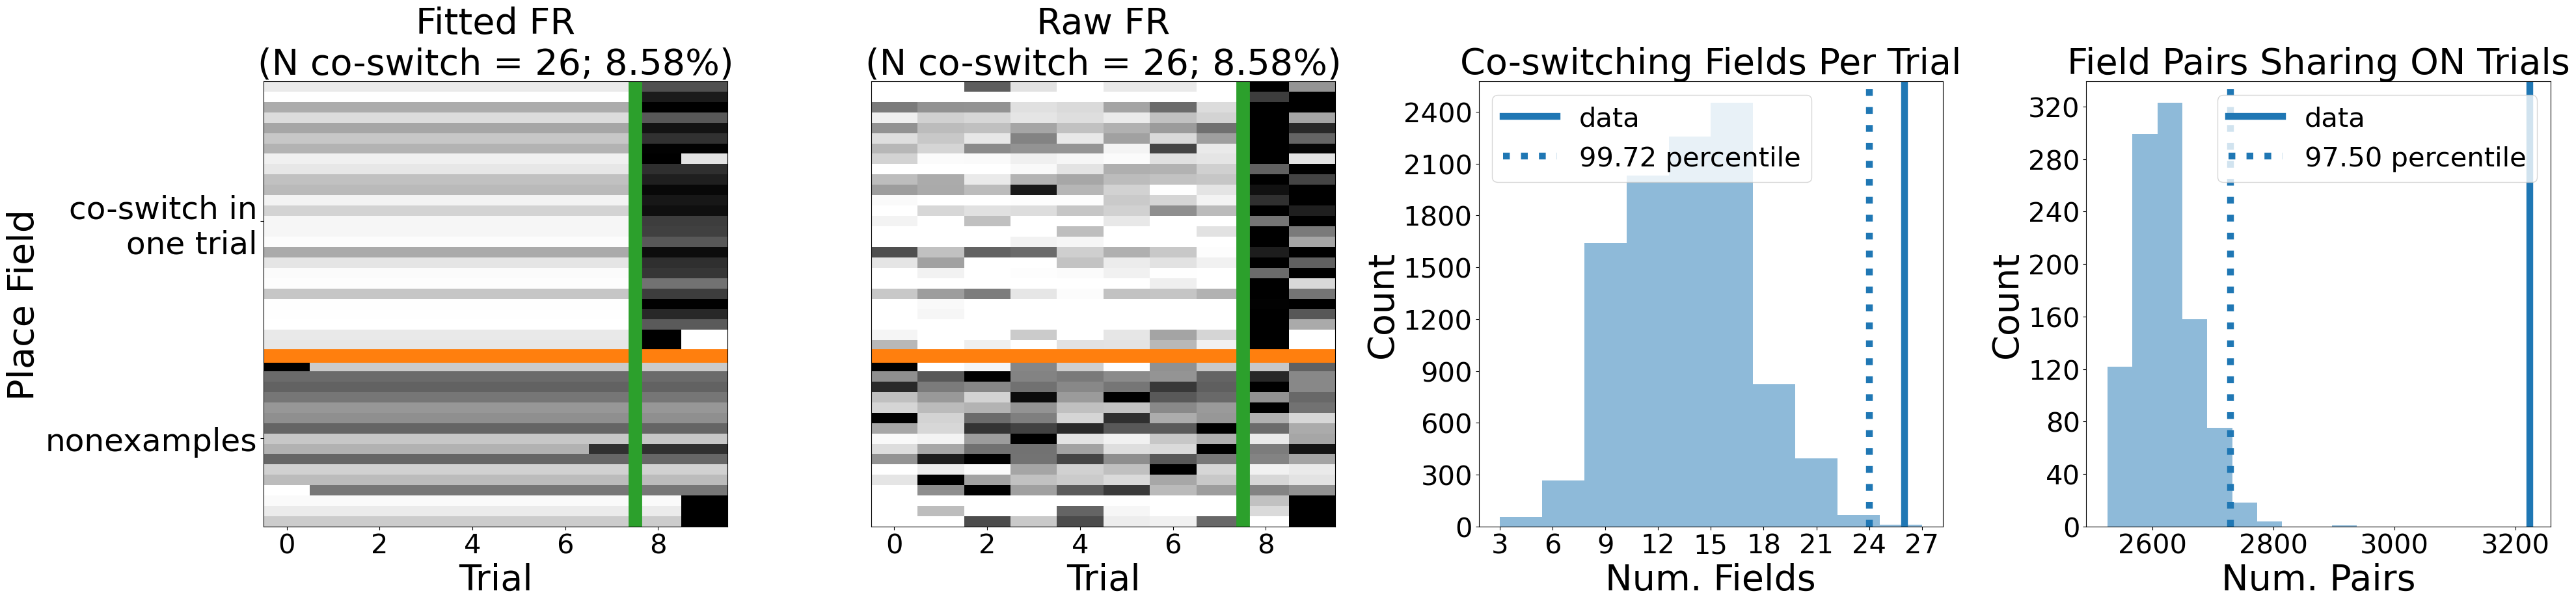

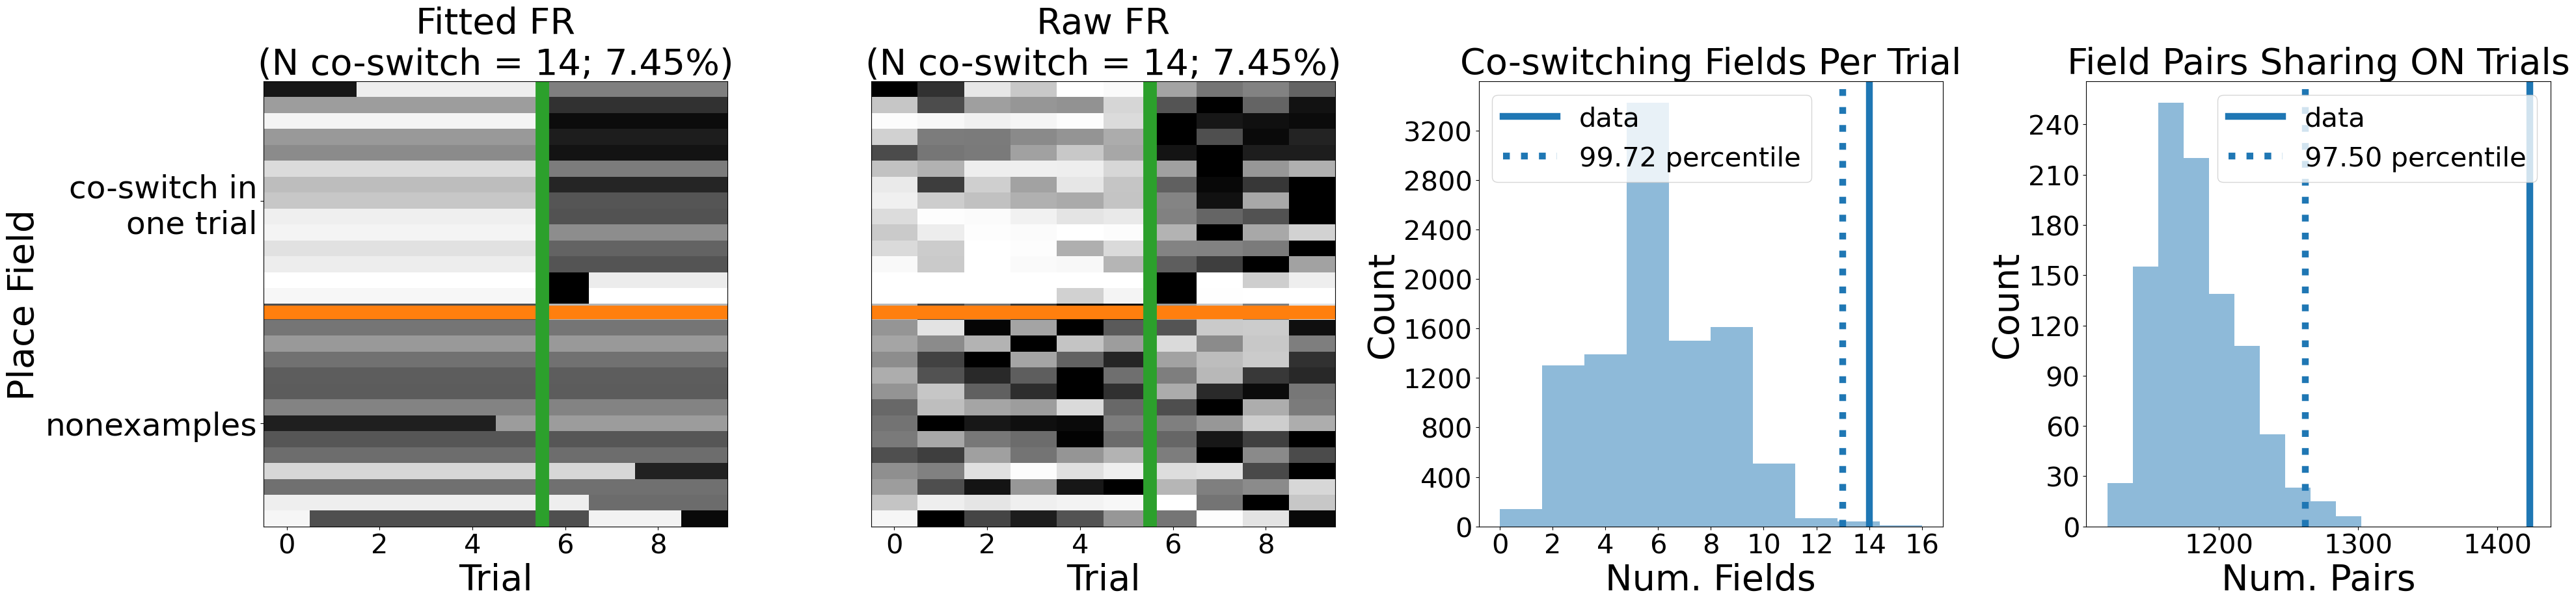

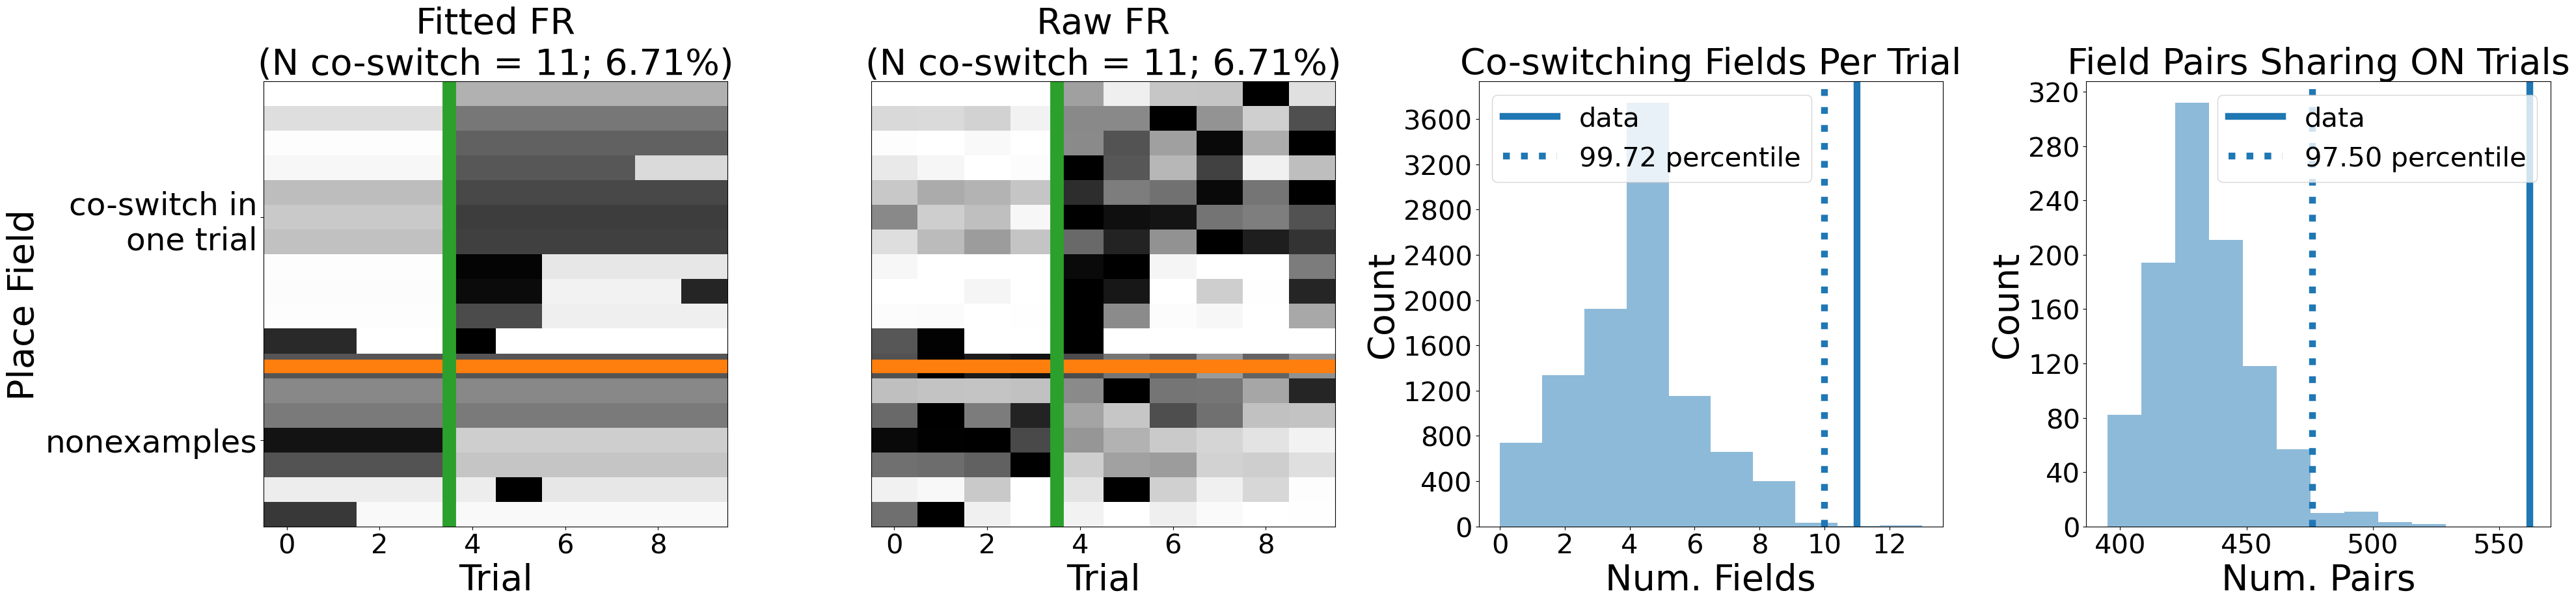

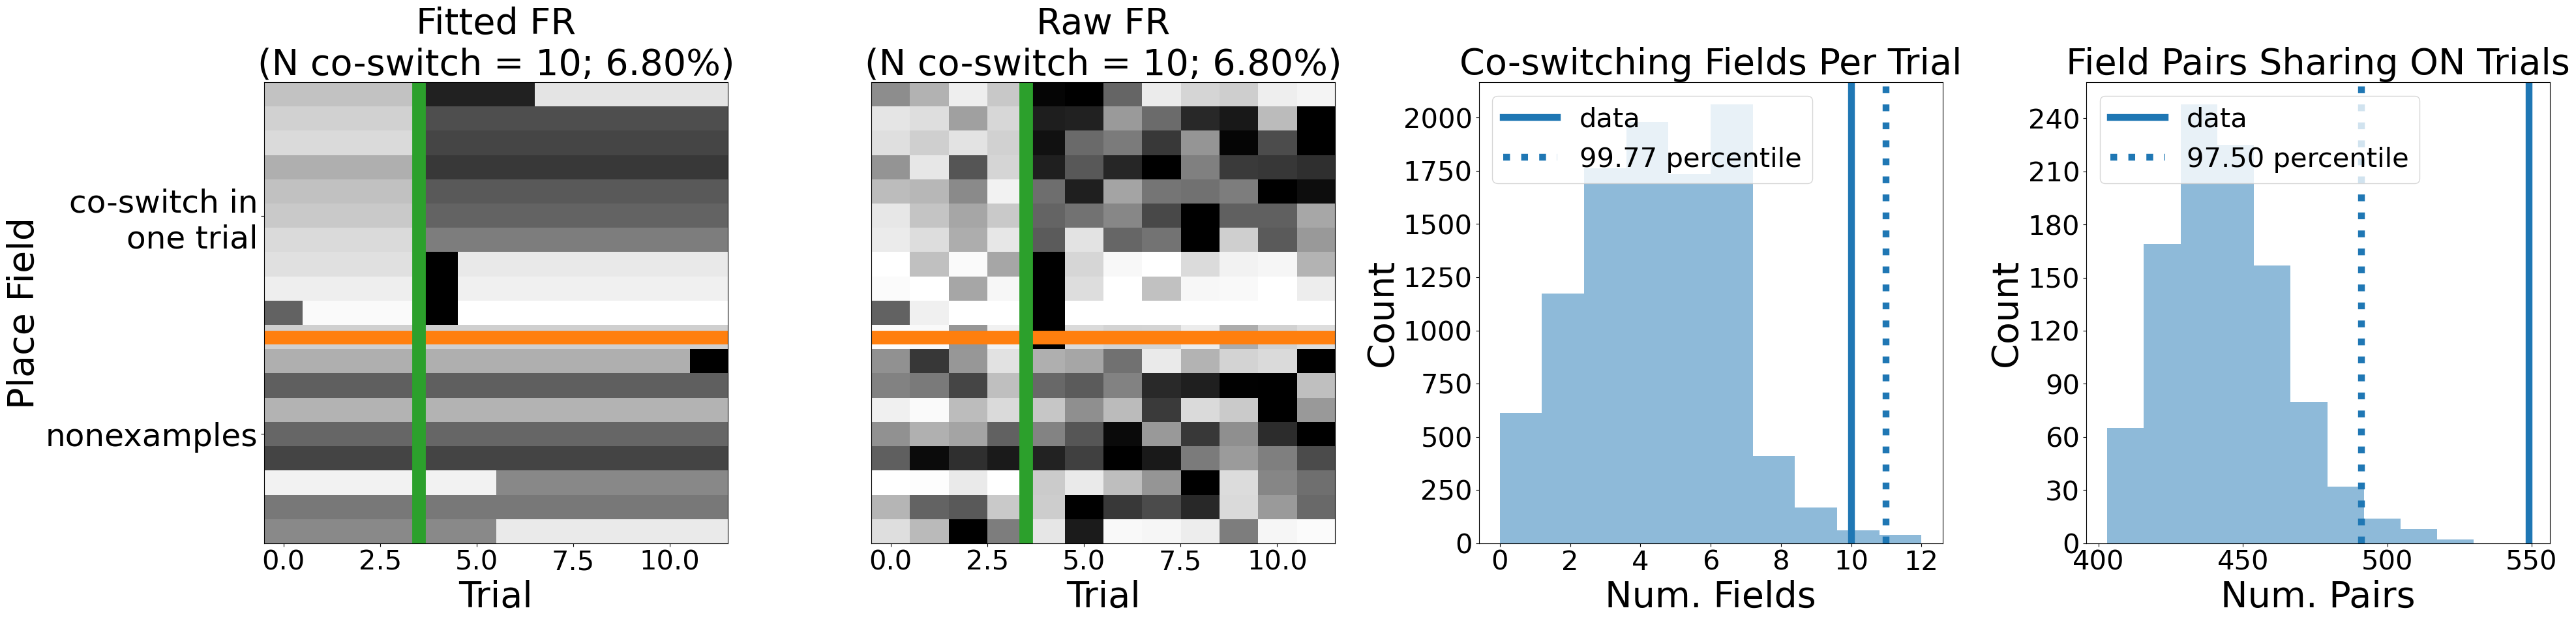

In [153]:
coswitching_plot_main(pf_res_l,sw_res_l,switch_detection_res_allsess,onoff = 1,dosave=True,n_shuffle=10000,nrepeats_pairwise=1000)





/tmp/ipykernel_56149/1030967376.py:45: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)
/tmp/ipykernel_56149/1030967376.py:45: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)
/tmp/ipykernel_56149/1030967376.py:45: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)
/tmp/ipykernel_56149/1030967376.py:45: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)
/tmp/ipykernel_56149/1030967376.py:45: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['chan

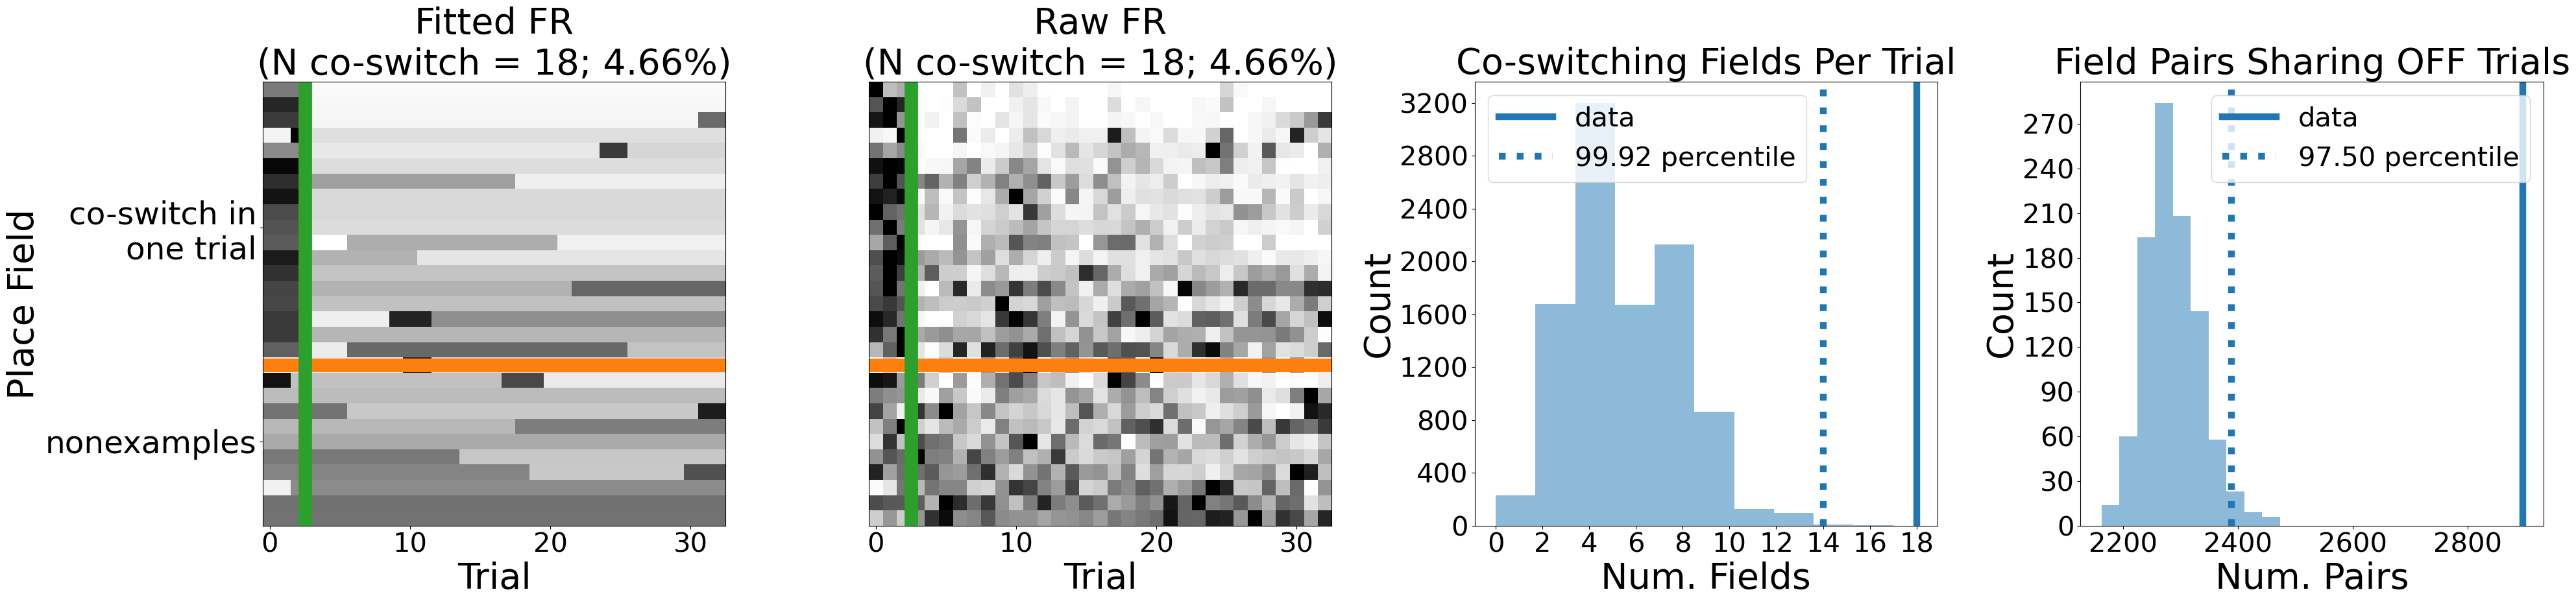

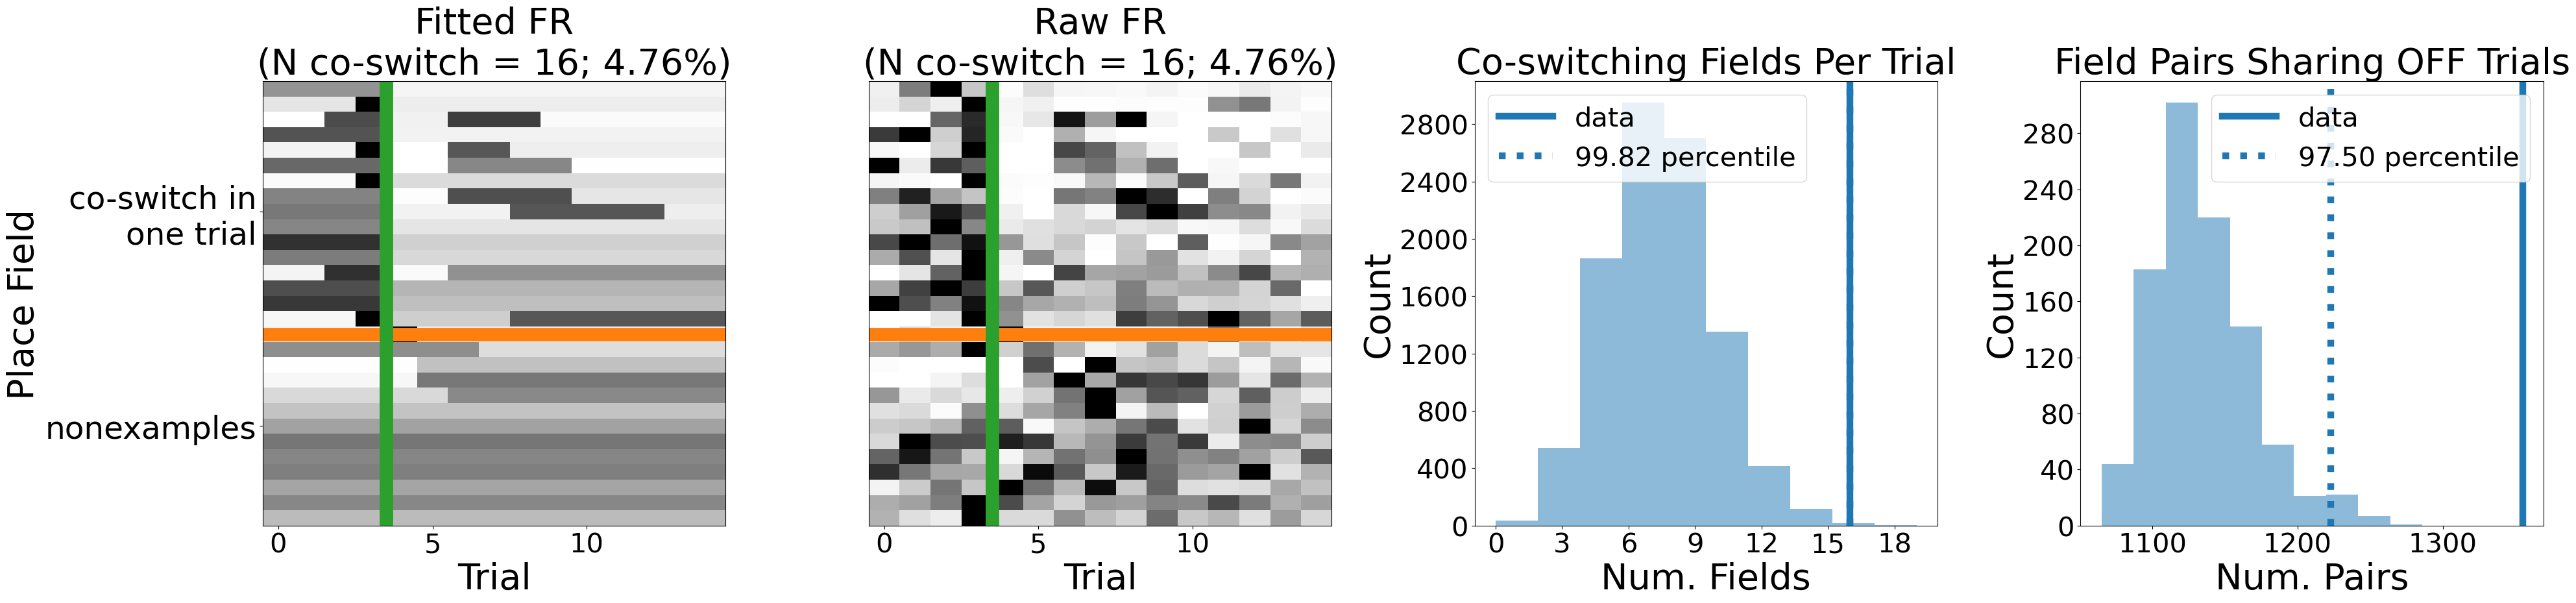

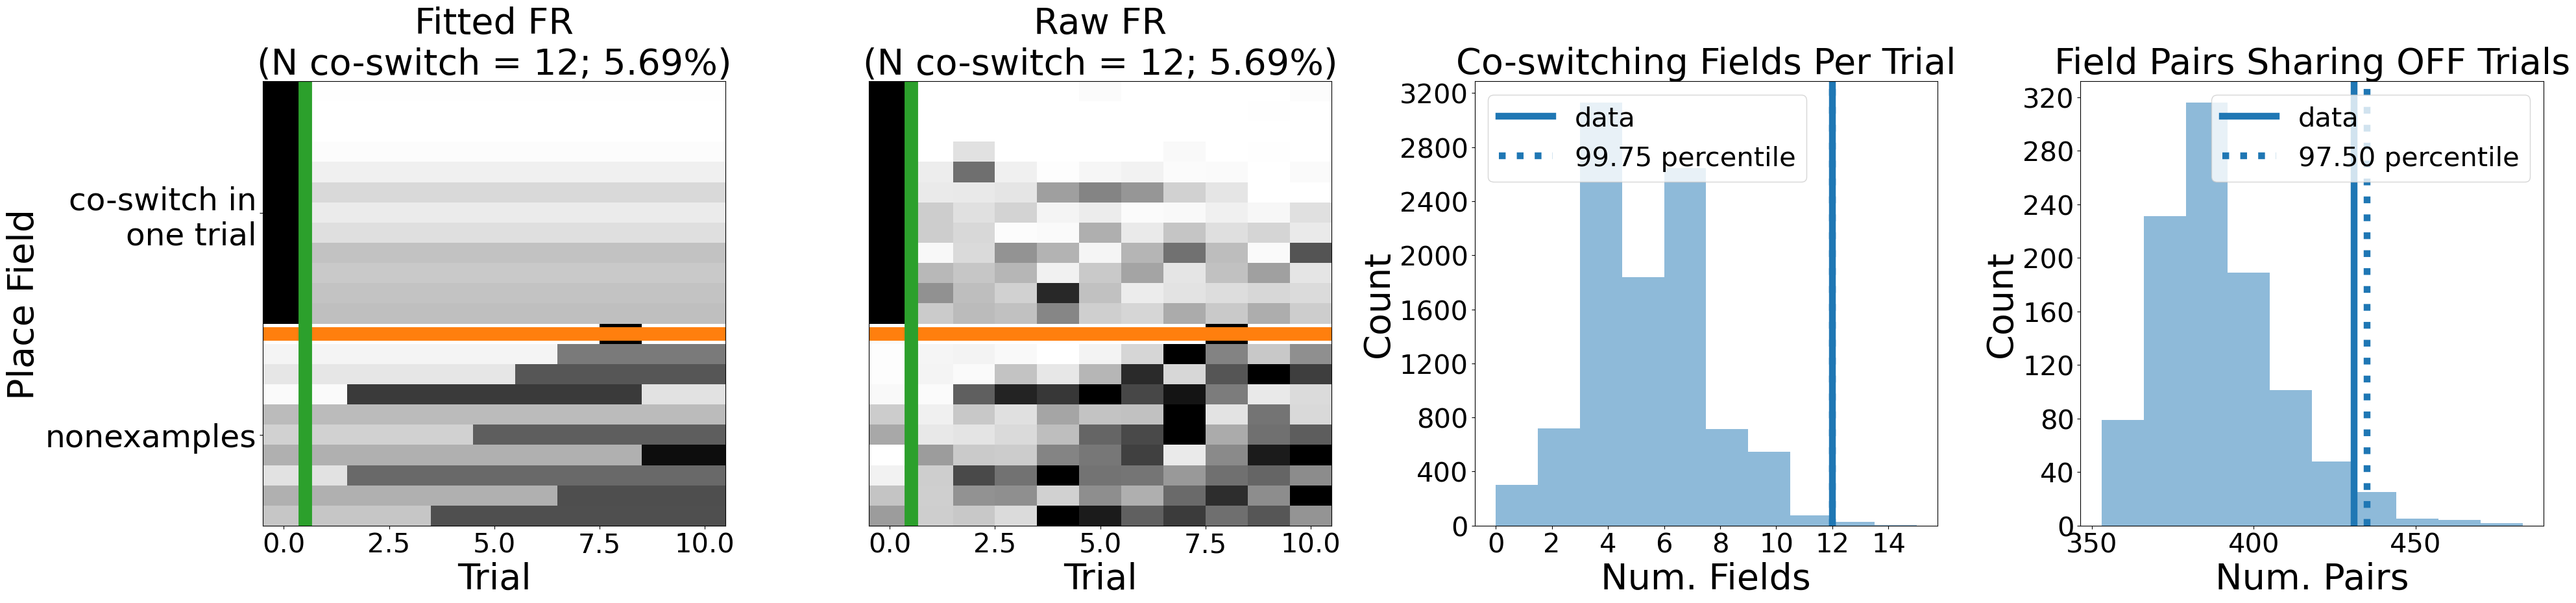

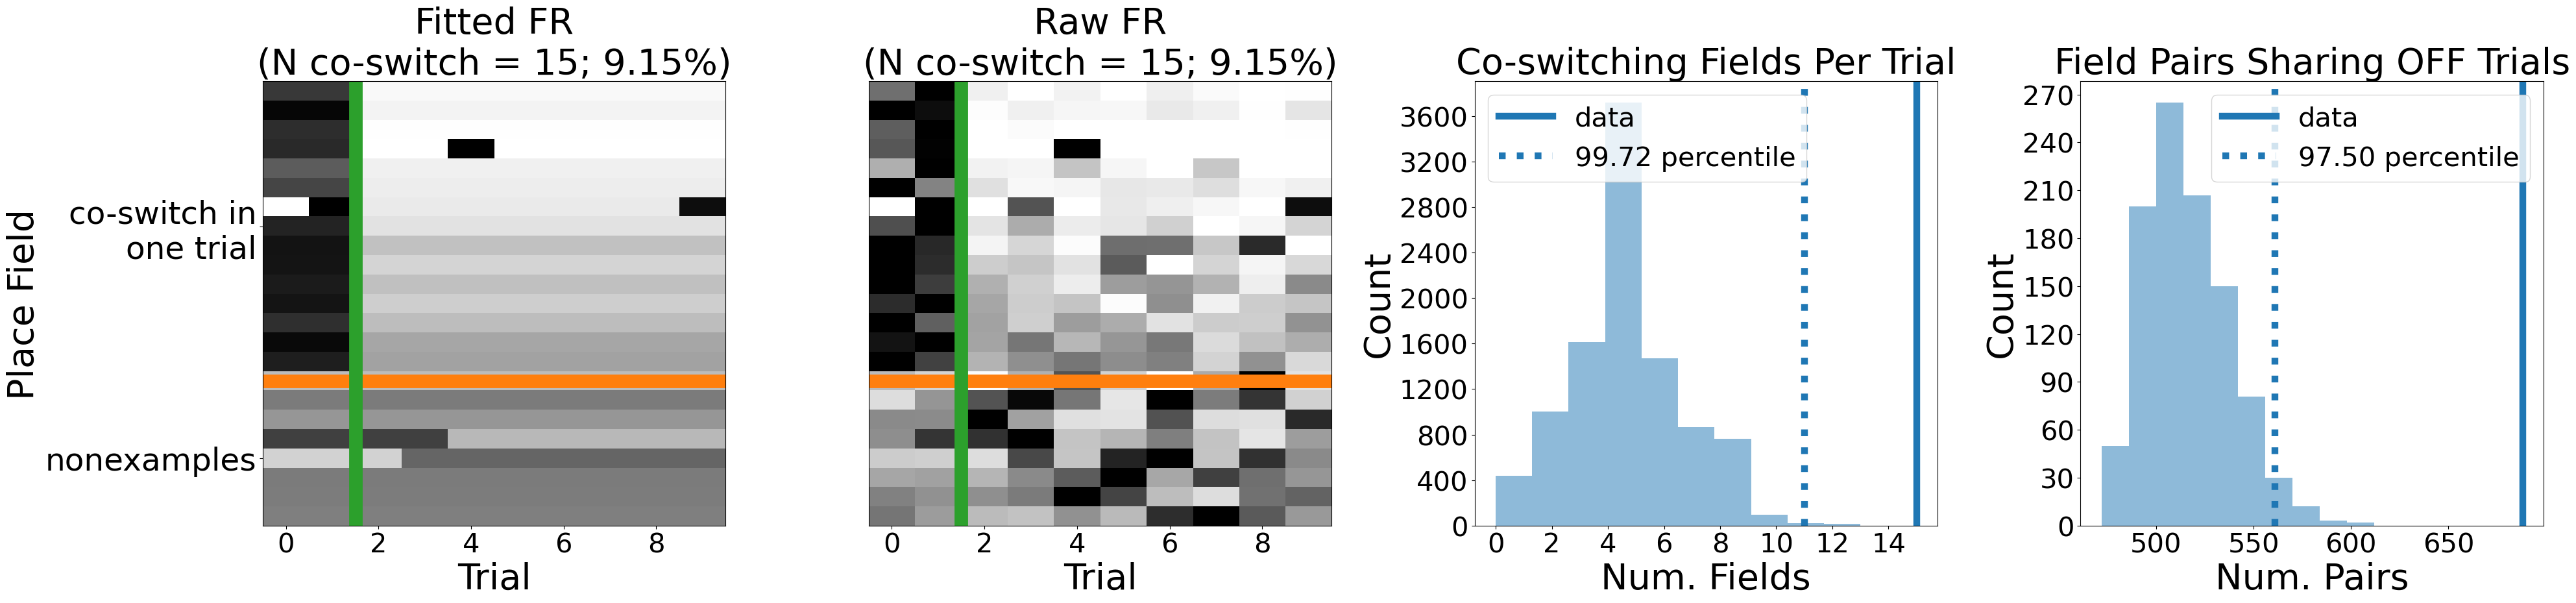

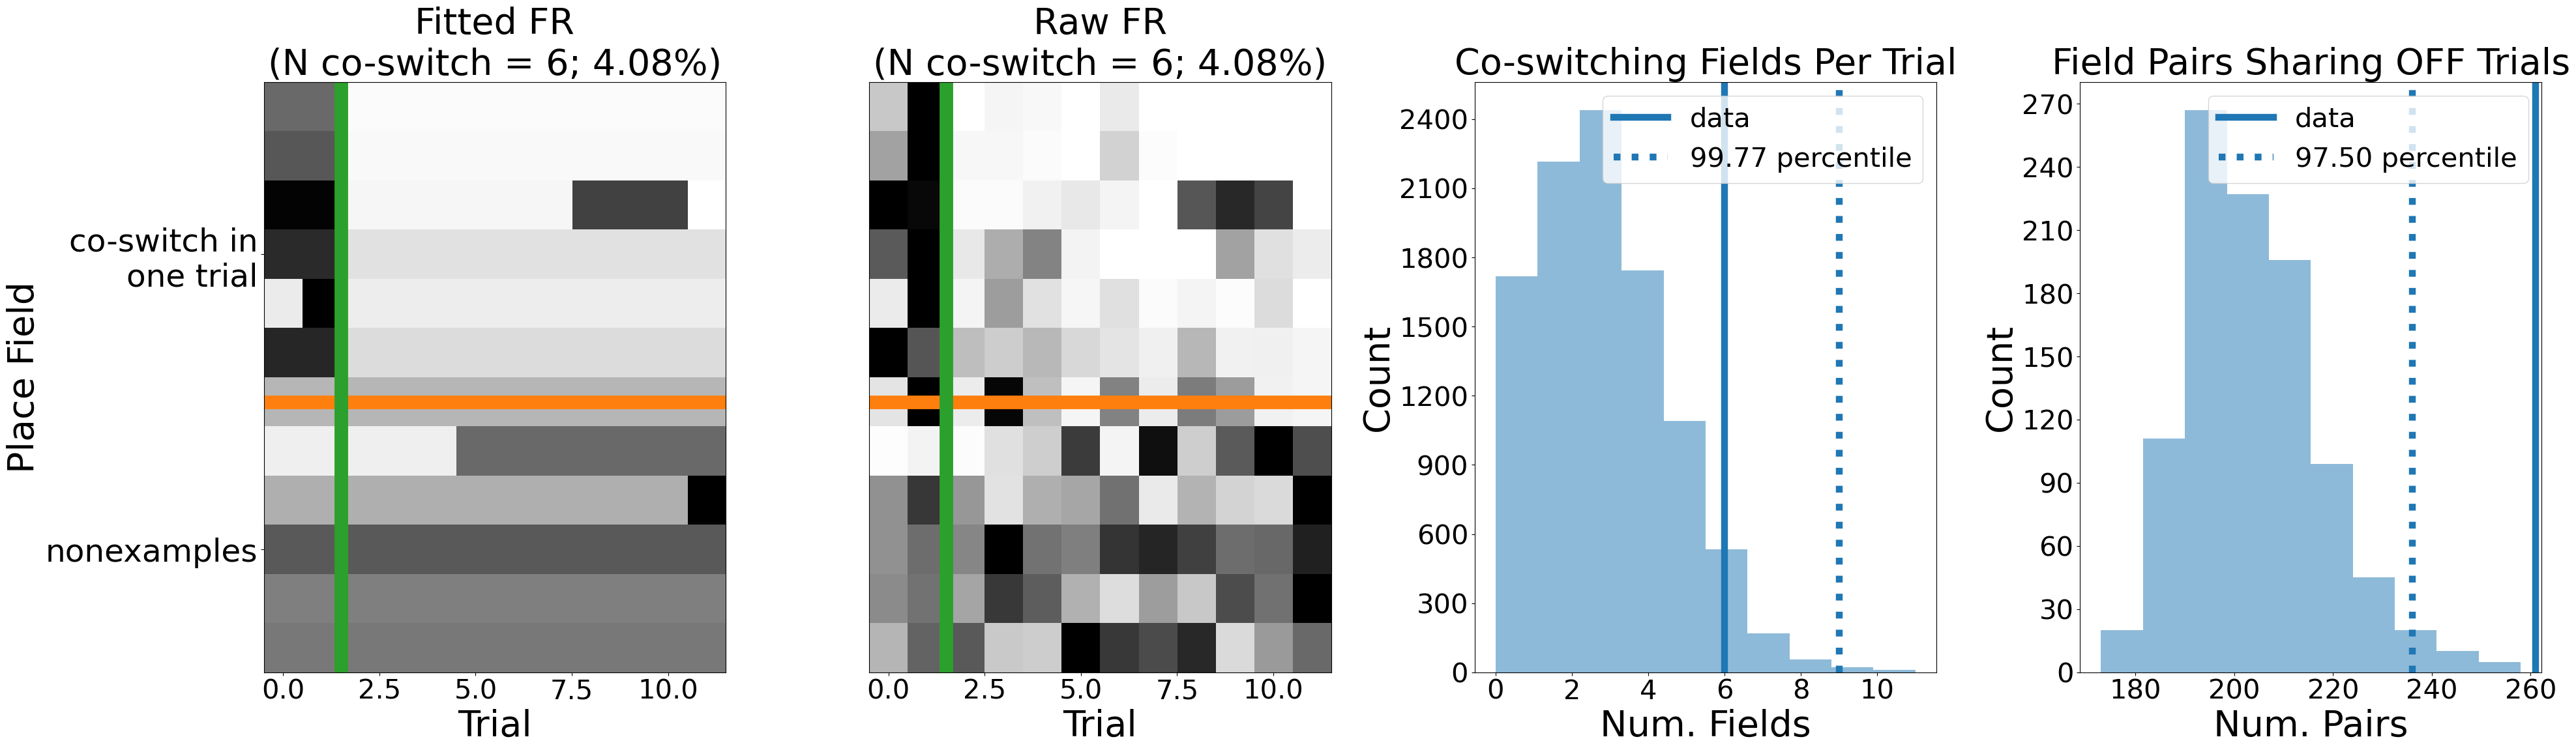

In [154]:
coswitching_plot_main(pf_res_l,sw_res_l,switch_detection_res_allsess,onoff = -1,dosave=True,n_shuffle=10000,nrepeats_pairwise=1000)



/tmp/ipykernel_3947169/904570360.py:36: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)
/tmp/ipykernel_3947169/904570360.py:36: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)
/tmp/ipykernel_3947169/904570360.py:36: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)
/tmp/ipykernel_3947169/904570360.py:36: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)
/tmp/ipykernel_3947169/904570360.py:36: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df =sw_res[detection][

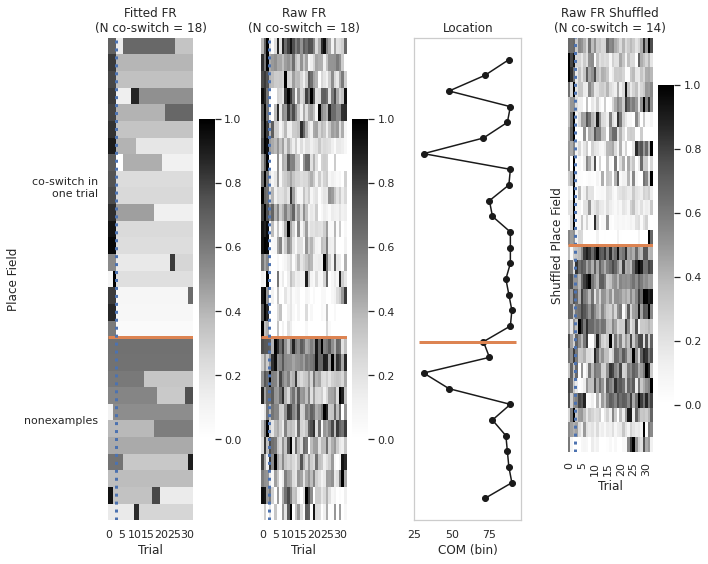

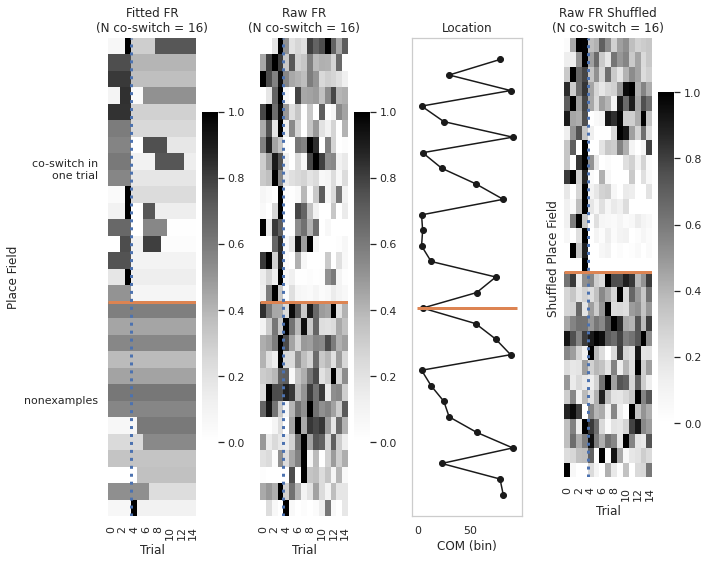

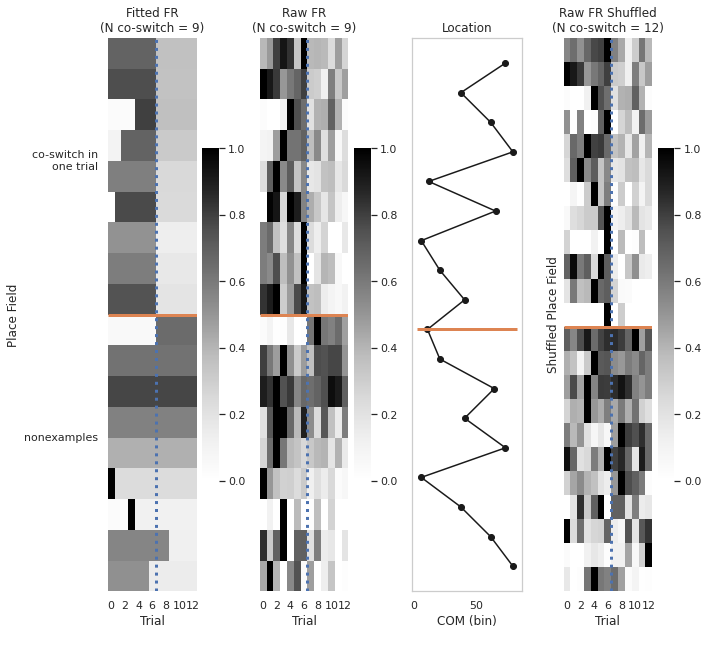

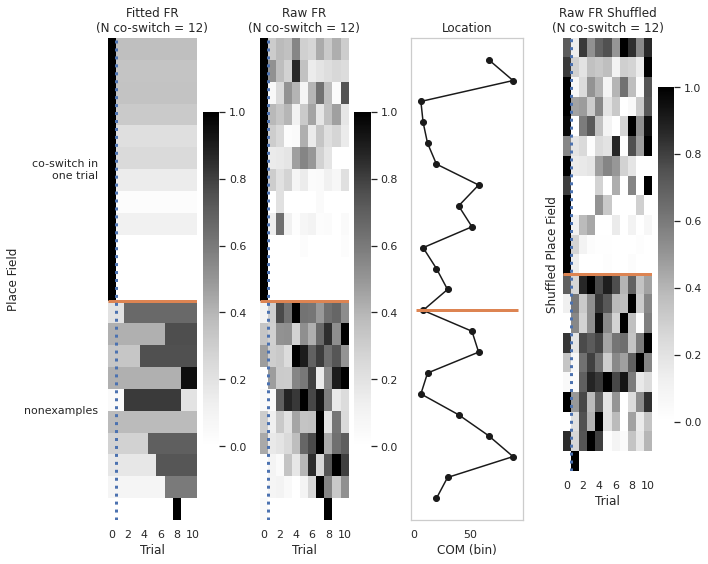

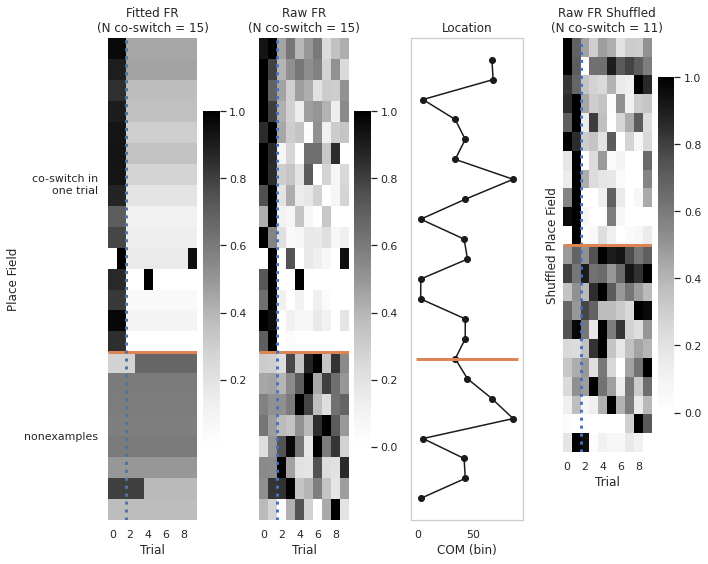

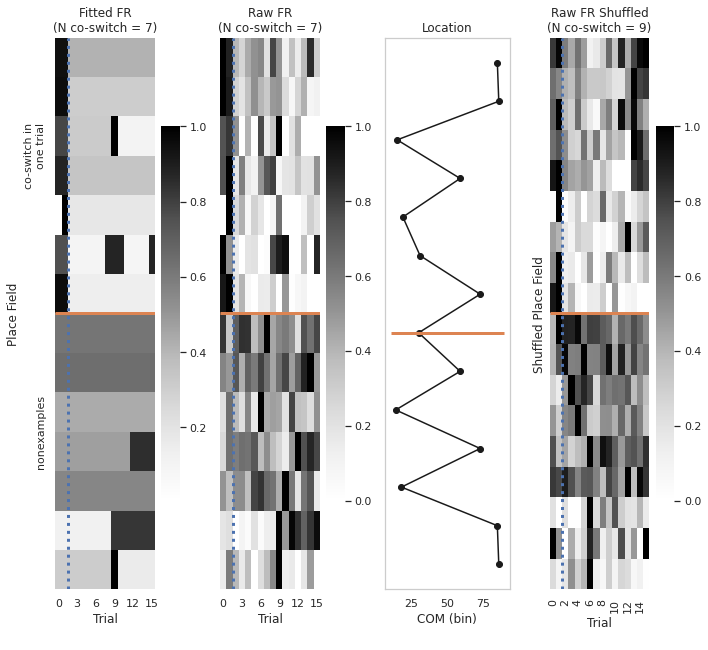

In [43]:
# reload(cppa)

# detection = 'avg'
# pen = 0.3
# sw_def = 'switch_magnitude'
# threshold = 0.4
# sw_ind = (slice(None),slice(None),pen,sw_def,threshold)
# onoff = -1
# onoff_str={1:'on',-1:'off'}[onoff]
# n_shuffle = 10000
# do_sort = True

# for ii,(pf_res, sw_res) in enumerate(zip(pf_res_l,sw_res_l)):
#     sess = data_dir_full_l[ii].split('/')[-1]
# #     if onoff==1:
#     sigpos = sw_res[detection]['sig'].loc[sw_ind] * (sw_res[detection]['cdf'].loc[sw_ind]>0.95)

# #         sigpos = sw_res[detection]['sig'].loc[sw_ind] * (sw_res[detection]['cdf'].loc[sw_ind]<0.05)
#     changes = sw_res[detection]['changes_df'].loc[sw_ind]

    
#     # select trialtype, trial_index
#     if sigpos[onoff_str].any().any():
#         sig=True
#         rawinds=np.nonzero(sigpos[onoff_str].values==True) # avoid nan!!!
#         trialtype=sigpos[onoff_str].index[rawinds[0][0]]
#         trial_index = sigpos[onoff_str].columns[rawinds[1][0]]
#     else:
#         sig=False
#         trialtype = (0,0)
#         trial_index = ((changes.loc[trialtype]==onoff).sum(axis=0)).idxmax()
    
#     X_pwc=sw_res[detection]['X'][0.3][trialtype]
#     X_raw = sw_res[detection]['X']['raw'][trialtype]
#     all_fields=pf_res[detection]['all_fields'][trialtype]
#     changes_df =sw_res[detection]['changes_df'].loc[(*trialtype,pen,sw_def,threshold),:].dropna(axis=1)
    
#     all_field_selected_coms, field_coms, nonfield_coms_selected = cppa.get_coswitching_examples_nonexamples_inds(X_raw,X_pwc, all_fields, changes_df, trial_index,onoff=onoff,do_sort=do_sort)
#     height_original = len(all_field_selected_coms)
    
#     ### SHUFFLE!!!
# #     nfields,ntrials = X_pwc.shape
# #     new_start_inds=np.random.randint(ntrials-1,size=(1,nfields)) # sample independently for each field the starting point in the shift
# #     changes_df_shuffled = cpa.gen_circular_shuffle(changes_df,nrepeats=1,new_start_inds=new_start_inds)[0]
# #     X_pwc_shuffled = cpa.gen_circular_shuffle(X_pwc,nrepeats=1,new_start_inds=new_start_inds)[0]
# #     X_raw_shuffled =cpa.gen_circular_shuffle(X_raw,nrepeats=1,new_start_inds=new_start_inds)[0]
    
#     X_pwc_shuffled,X_raw_shuffled,changes_df_shuffled=get_highest_shuffle(X_pwc,X_raw, changes_df,trial_index,onoff=onoff,n_shuffle=n_shuffle,alpha=0.05,do_bonf=True)
    
#     all_field_selected_coms_shuffled, field_coms_shuffled, nonfield_coms_selected_shuffled = cppa.get_coswitching_examples_nonexamples_inds(X_raw_shuffled,X_pwc_shuffled, all_fields, changes_df_shuffled, trial_index,onoff=onoff,do_sort=do_sort)
    
    
# #     height_shuffle = len(field_coms_shuffled)
#     height_shuffle = len(all_field_selected_coms_shuffled)
    
    
#     #### plot
# #     fig,axs = plt.subplots(1,4,gridspec_kw={'height_ratios':[height_original,height_original,height_original,height_shuffle]})
# #     fig,axs = plt.subplots(1,4)
#     fig = plt.figure(figsize=(10,8))
#     axs = fig.subplot_mosaic([
#         [0,1,2,3],
#         [0,1,2,4]
#     ],
#         gridspec_kw={"height_ratios":[height_shuffle,height_original-height_shuffle]}
#     )
#     axs_sub = [axs[i] for i in range(3)]

    

#     fig,_ = cppa.show_coswitching_examples_nonexamples_withcom(X_raw,X_pwc,all_fields,changes_df,trial_index,onoff=onoff,
#                                                                  all_field_selected_coms=all_field_selected_coms,field_coms=field_coms,nonfield_coms_selected=nonfield_coms_selected,
#                                                                  fig=fig,axs=axs_sub,do_sort=do_sort
#                                                                 )
# #     sns.heatmap(X_raw_shuffled.loc[field_coms_shuffled.index],cmap='Greys',ax=axs[3])
#     sns.heatmap(X_raw_shuffled.loc[all_field_selected_coms_shuffled.index],cmap='Greys',ax=axs[3])
    
#     yticks = [int(len(field_coms_shuffled)/2),len(field_coms)+int(len(nonfield_coms_selected_shuffled)/2)]
#     axs[3].set(ylabel='Shuffled Place Field',yticks=[],title=f"Raw FR Shuffled\n(N co-switch = {len(field_coms_shuffled)})",xlabel='Trial')
#     axs[3].vlines(trial_index,*axs[3].get_ylim(),linewidth=3,linestyle=':',color='C0')
#     axs[3].hlines(len(field_coms_shuffled),*axs[3].get_xlim(),linewidth=3,color='C1')
#     axs[4].axis('off')
#     plt.tight_layout()
    
#     if ii<(len(data_dir_full_l)-1):
#         figfn = f'coswitching_ex_{sess}_sig_{sig}.pdf'
#     fig.savefig(os.path.join(figdir,figfn))

# add in nmf test

# add in sig session per animal

In [ ]:
def get_per_animal_sig_trial_histogram():

In [81]:
ani_tt_slice = (slice(None),slice(None),slice(None),slice(None))

In [295]:
onoff_str='on'
df=switch_detection_res_allsess['avg']['sig_pos'].loc[(*ani_tt_slice,0.3,'switch_magnitude',0.4),onoff_str].droplevel((-1,-2,-3))
per_ani_sig_trial_hist_splittrialtype=(df==True).sum(axis=1).groupby(level=(0,1,2)).sum().groupby(level=(0,2)).value_counts()

per_ani_sig_trial_hist_splittrialtype

e13_16f1  0  0    4
             1    4
             2    1
e13_26m1  0  0    3
             1    1
             2    1
e14_2m3   0  0    4
e15_10m1  0  0    3
             1    1
             2    1
e15_13f1  0  0    1
             1    1
             2    1
             3    1
e15_9f1   0  0    2
             1    1
e16_1f1   0  0    6
             1    1
e16_2m1   0  0    2
e16_3m1   0  0    4
e16_3m2   0  1    2
             0    1
             2    1
dtype: int64

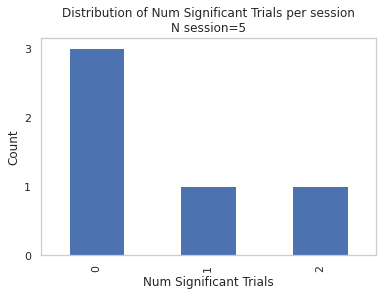

In [306]:
ani_l = ['e13_26m1']
task_index = 0
for ani in ani_l:
    ax=per_ani_sig_trial_hist_splittrialtype.loc[ani,task_index].plot.bar()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    nsess=per_ani_sig_trial_hist_splittrialtype.loc[ani,task_index].sum()
    ax.set(ylabel='Count', xlabel='Num Significant Trials',title=f'Distribution of Num Significant Trials per Session\nN session={nsess}')
    
    

In [266]:
reload(cppa)

<module 'change_point_post_analysis' from '/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py'>

In [264]:
switch_detection_res_allsess[detection]['sig_pos']['on'].groupby(level=(0,1,2,3)).apply(lambda x:x.droplevel((-1,-2,-3)).dropna(axis=1).shape[1]).groupby(level=(0,1,2)).sum()




e13_16f1  e13_16f1_210302  0    22
          e13_16f1_210312  0    21
          e13_16f1_210314  0    25
          e13_16f1_210315  0    20
          e13_16f1_210317  0    25
          e13_16f1_210319  0    26
          e13_16f1_210322  0    25
          e13_16f1_210328  0    21
          e13_16f1_210331  0    22
e13_26m1  e13_26m1_210913  0    70
          e13_26m1_211019  0    45
          e13_26m1_211116  0    21
          e13_26m1_211119  0    25
          e13_26m1_211124  0    26
e14_2m3   e14_2m3_201125   0    22
          e14_2m3_201129   0    25
          e14_2m3_201206   0    32
          e14_2m3_201208   0    38
e15_10m1  e15_10m1_200716  0    20
          e15_10m1_200719  0    20
          e15_10m1_200723  0    16
          e15_10m1_200809  0    21
          e15_10m1_200812  0    22
e15_13f1  e15_13f1_220117  0    32
          e15_13f1_220118  0    25
          e15_13f1_220119  0    29
          e15_13f1_220120  0    46
e15_9f1   e15_9f1_200723   0    22
          e15_9f1_20

In [262]:
per_ani_sig_trial_hist

e13_16f1  0    13
          1     4
          2     1
e13_26m1  0     7
          1     3
e14_2m3   0     8
e15_10m1  0     7
          1     3
e15_13f1  0     4
          1     2
          2     2
e15_9f1   0     5
          1     1
e16_1f1   0    13
          1     1
e16_2m1   0     4
e16_3m1   0     8
e16_3m2   0     5
          1     2
          2     1
dtype: int64

In [96]:
(df.loc['e15_13f1']==True).sum(axis=1)

e15_13f1_220117  0  0    1
                    1    2
e15_13f1_220118  0  0    0
                    1    1
e15_13f1_220119  0  0    0
                    1    2
e15_13f1_220120  0  0    0
                    1    0
dtype: int64

In [117]:
onoff_str='on'
df=switch_detection_res_allsess['avg']['sig_pos'].loc[(*ani_tt_slice,0.3,'switch_magnitude',0.4),onoff_str].droplevel((-1,-2,-3))
per_sess_sig_trial = (df==True).sum(axis=1)
per_ani_sig_trial_hist = df.groupby(level=(0)).apply(lambda x:(x==True).sum(axis=1).value_counts())
per_ani_sig_trial_hist

e13_16f1  0    13
          1     4
          2     1
e13_26m1  0     7
          1     3
e14_2m3   0     8
e15_10m1  0     7
          1     3
e15_13f1  0     4
          1     2
          2     2
e15_9f1   0     5
          1     1
e16_1f1   0    13
          1     1
e16_2m1   0     4
e16_3m1   0     8
e16_3m2   0     5
          1     2
          2     1
dtype: int64

In [105]:
db_sorted_reind = db_sorted.reset_index(drop=True).set_index(['animal_name.1','sess_name'])

In [118]:
per_sess_sig_trial=per_sess_sig_trial.to_frame()

In [170]:
# detection='trial_filter'
detection='avg'

In [206]:
switch_detection_res_allsess[detection]['sig_pos'].fillna(0).groupby(level=(0,1,4,5,6)).sum()

on                          \
                                                  0  1  2  3  4  5  6  7  8    
e13_16f1 e13_16f1_210302 raw switch_magnitude 0.4  0  1  0  0  0  0  0  0  0   
                         0.3 switch_magnitude 0.4  0  1  0  0  0  0  0  0  0   
         e13_16f1_210312 raw switch_magnitude 0.4  0  1  0  0  0  0  0  0  0   
                         0.3 switch_magnitude 0.4  0  0  0  0  0  0  0  0  0   
         e13_16f1_210314 raw switch_magnitude 0.4  0  1  0  0  1  0  0  1  0   
...                                               .. .. .. .. .. .. .. .. ..   
e16_3m2  e16_3m2_211211  0.3 switch_magnitude 0.4  0  0  0  0  0  0  0  0  0   
         e16_3m2_211212  raw switch_magnitude 0.4  0  1  0  0  0  0  0  0  0   
                         0.3 switch_magnitude 0.4  0  1  0  0  0  0  0  0  0   
         e16_3m2_211213  raw switch_magnitude 0.4  0  0  0  0  0  0  0  0  0   
                         0.3 switch_magnitude 0.4  0  0  0  0  1  1  0  0  0   

                                                      ... off    on           \
                                                  9   ...  31 32 33 34 35 36   
e13_16f1 e13_16f1_210302 raw switch_magnitude 0.4  0  ...   0  0  0  0  0  0   
                         0.3 switch_magnitude 0.4  0  ...   0  0  0  0  0  0   
         e13_16f1_210312 raw switch_magnitude 0.4  0  ...   0  0  0  0  0  0   
                         0.3 switch_magnitude 0.4  0  ...   0  0  0  0  0  0   
         e13_16f1_210314 raw switch_magnitude 0.4  0  ...   0  0  0  0  0  0   
...                                               ..  ...  .. .. .. .. .. ..   
e16_3m2  e16_3m2_211211  0.3 switch_magnitude 0.4  1  ...   0  0  0  0  0  0   
         e16_3m2_211212  raw switch_magnitude 0.4  0  ...   0  0  0  0  0  0   
                         0.3 switch_magnitude 0.4  0  ...   0  0  0  0  0  0   
         e16_3m2_211213  raw switch_magnitude 0.4  0  ...   0  0  0  0  0  0   
                         0.3 switch_magnitude 0.4  0  ...   0  0  0  0  0  0   

                                                  off           
                                                   33 34 35 36  
e13_16f1 e13_16f1_210302 raw switch_magnitude 0.4   0  0  0  0  
                         0.3 switch_magnitude 0.4   0  0  0  0  
         e13_16f1_210312 raw switch_magnitude 0.4   0  0  0  0  
                         0.3 switch_magnitude 0.4   0  0  0  0  
         e13_16f1_210314 raw switch_magnitude 0.4   0  0  0  0  
...                                                .. .. .. ..  
e16_3m2  e16_3m2_211211  0.3 switch_magnitude 0.4   0  0  0  0  
         e16_3m2_211212  raw switch_magnitude 0.4   0  0  0  0  
                         0.3 switch_magnitude 0.4   0  0  0  0  
         e16_3m2_211213  raw switch_magnitude 0.4   0  0  0  0  
                         0.3 switch_magnitude 0.4   0  0  0  0  

[94 rows x 74 columns]

In [207]:
# df=switch_detection_res_allsess[detection]['sig_pos'].groupby(level=(0,1,4,5,6)).any().groupby(axis=1,level=0).sum()
df=switch_detection_res_allsess[detection]['sig_pos'].fillna(0).groupby(level=(0,1,4,5,6)).sum().groupby(axis=1,level=0).sum()
df=df.unstack(level=(-1,-2,-3))
db_sorted_reind_filtered=db_sorted.reset_index(drop=True).set_index(['animal_name.1','sess_name']).loc[df.index]
df['n_pyr'] = db_sorted_reind_filtered['n_pyr_putative']
df['n_trial'] = db_sorted_reind_filtered['ntrials']




In [217]:
switch_detection_res_allsess[detection]['sig_pos'].loc['e13_16f1','e13_16f1_210314']['on'].dropna(axis=1)

/tmp/ipykernel_3947169/2040202532.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  switch_detection_res_allsess[detection]['sig_pos'].loc['e13_16f1','e13_16f1_210314']['on'].dropna(axis=1)


0      1      2      3      4      5  6  7   \
0 0 raw switch_magnitude 0.4  False   True  False  False  False  False  0  1   
    0.3 switch_magnitude 0.4  False   True  False  False  False  False  0  1   
  1 raw switch_magnitude 0.4  False  False  False  False   True  False  0  0   
    0.3 switch_magnitude 0.4  False  False  False  False  False  False  0  0   

                             8  9  10  
0 0 raw switch_magnitude 0.4  0  0  0  
    0.3 switch_magnitude 0.4  0  0  0  
  1 raw switch_magnitude 0.4  0  0  0  
    0.3 switch_magnitude 0.4  0  0  0

In [220]:
switch_detection_res_allsess[detection]['sig_pos'].fillna(0).groupby(level=(0,1,4,5,6)).sum().loc['e13_16f1','e13_16f1_210314']



on                             ... off    on        \
                         0  1  2  3  4  5  6  7  8  9   ...  31 32 33 34 35   
raw switch_magnitude 0.4  0  1  0  0  1  0  0  1  0  0  ...   0  0  0  0  0   
0.3 switch_magnitude 0.4  0  1  0  0  0  0  0  1  0  0  ...   0  0  0  0  0   

                            off           
                         36  33 34 35 36  
raw switch_magnitude 0.4  0   0  0  0  0  
0.3 switch_magnitude 0.4  0   0  0  0  0  

[2 rows x 74 columns]

In [221]:
switch_detection_res_allsess[detection]['sig_pos'].fillna(0).loc['e13_16f1','e13_16f1_210314']



/tmp/ipykernel_3947169/3077532636.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  switch_detection_res_allsess[detection]['sig_pos'].fillna(0).loc['e13_16f1','e13_16f1_210314']


on                                           \
                                 0      1      2      3      4      5  6  7    
0 0 raw switch_magnitude 0.4  False   True  False  False  False  False  0  1   
    0.3 switch_magnitude 0.4  False   True  False  False  False  False  0  1   
  1 raw switch_magnitude 0.4  False  False  False  False   True  False  0  0   
    0.3 switch_magnitude 0.4  False  False  False  False  False  False  0  0   

                                    ... off    on          off           
                             8  9   ...  31 32 33 34 35 36  33 34 35 36  
0 0 raw switch_magnitude 0.4  0  0  ...   0  0  0  0  0  0   0  0  0  0  
    0.3 switch_magnitude 0.4  0  0  ...   0  0  0  0  0  0   0  0  0  0  
  1 raw switch_magnitude 0.4  0  0  ...   0  0  0  0  0  0   0  0  0  0  
    0.3 switch_magnitude 0.4  0  0  ...   0  0  0  0  0  0   0  0  0  0  

[4 rows x 74 columns]

In [208]:
df

off                   on     n_pyr  \
                                      0.4                  0.4             
                         switch_magnitude     switch_magnitude             
                                      raw 0.3              raw 0.3         
e13_16f1 e13_16f1_210302                0   0                1   1   114   
         e13_16f1_210312                0   0                1   0   105   
         e13_16f1_210314                0   0                3   2   102   
         e13_16f1_210315                0   2                0   0    92   
         e13_16f1_210317                1   0                2   0   112   
         e13_16f1_210319                0   0                1   1    95   
         e13_16f1_210322                0   0                1   0    87   
         e13_16f1_210328                2   0                1   1   174   
         e13_16f1_210331                1   1                0   1   132   
e13_26m1 e13_26m1_210913                2   1                3   2   422   
         e13_26m1_211019                2   1                1   0   228   
         e13_26m1_211116                0   1                0   0   173   
         e13_26m1_211119                0   0                0   1   158   
         e13_26m1_211124                1   0                0   0   153   
e14_2m3  e14_2m3_201125                 0   0                1   0    57   
         e14_2m3_201129                 0   0                1   0    57   
         e14_2m3_201206                 1   0                0   0    52   
         e14_2m3_201208                 0   0                1   0    52   
e15_10m1 e15_10m1_200716                0   0                1   0    64   
         e15_10m1_200719                1   0                2   0    52   
         e15_10m1_200723                0   0                2   2    71   
         e15_10m1_200809                1   0                1   0   103   
         e15_10m1_200812                1   1                1   1   102   
e15_13f1 e15_13f1_220117                2   0                3   3   333   
         e15_13f1_220118                2   0                2   1   318   
         e15_13f1_220119                2   1                4   2   288   
         e15_13f1_220120                2   0                1   0   248   
e15_9f1  e15_9f1_200723                 0   0                0   0    62   
         e15_9f1_200729                 1   1                2   0    98   
         e15_9f1_200809                 1   0                2   1   105   
e16_1f1  e16_1f1_200917                 0   1                2   0    52   
         e16_1f1_200918                 0   0                0   0    52   
         e16_1f1_200919                 0   0                0   0    52   
         e16_1f1_200920                 0   0                0   0    62   
         e16_1f1_200923                 1   0                2   0    50   
         e16_1f1_201002                 2   0                0   1    75   
         e16_1f1_201004                 1   1                0   0    66   
e16_2m1  e16_2m1_201129                 1   0                1   0    57   
         e16_2m1_201206                 0   0                2   0    56   
e16_3m1  e16_3m1_210111                 1   1                3   0   162   
         e16_3m1_210119                 0   0                0   0   121   
         e16_3m1_210201                 0   0                1   0   144   
         e16_3m1_210203                 0   0                1   0   160   
e16_3m2  e16_3m2_211210                 0   1                1   0   159   
         e16_3m2_211211                 0   0                0   1   161   
         e16_3m2_211212                 1   0                1   1   162   
         e16_3m2_211213                 1   3                1   2   163   

                         n_trial  
                                  
                                  
                                  
e13_16f1 e13_16f1_210

In [172]:
(df>0).mean(axis=0)

off      0.4  switch_magnitude  raw    0.489362
                                0.3    0.276596
on       0.4  switch_magnitude  raw    0.702128
                                0.3    0.361702
n_pyr                                  1.000000
n_trial                                1.000000
dtype: float64

In [169]:
(df>0).mean(axis=0)

off      0.4  switch_magnitude  raw    0.595745
                                0.3    0.297872
on       0.4  switch_magnitude  raw    0.808511
                                0.3    0.446809
n_pyr                                  1.000000
n_trial                                1.000000
dtype: float64

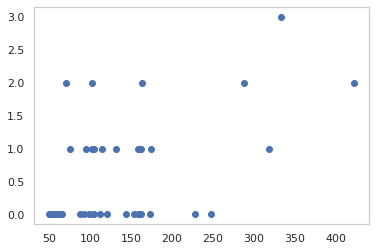

In [209]:
plt.scatter(df['n_pyr'],df.loc[:,('on',0.4,'switch_magnitude',0.3)])

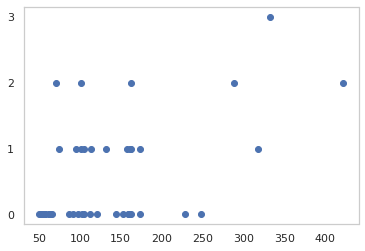

In [194]:
reload(cppa)
from matplotlib.ticker import MaxNLocator
fig,ax=cppa.plot_n_sig_trials_and_meta_data(switch_detection_res_allsess,db_sorted,'n_pyr',onoff_str='on',detection='avg',n_sig_trial_meta_df=None,sw_ind=(0.4,'switch_magnitude',0.3),
                                fig=None,ax=None
)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [189]:
df

off                   on     n_pyr  \
                                      0.4                  0.4             
                         switch_magnitude     switch_magnitude             
                                      raw 0.3              raw 0.3         
e13_16f1 e13_16f1_210302                0   0                1   1   114   
         e13_16f1_210312                0   0                1   0   105   
         e13_16f1_210314                0   0                3   2   102   
         e13_16f1_210315                0   2                0   0    92   
         e13_16f1_210317                1   0                2   0   112   
         e13_16f1_210319                0   0                1   1    95   
         e13_16f1_210322                0   0                1   0    87   
         e13_16f1_210328                2   0                1   1   174   
         e13_16f1_210331                1   1                0   1   132   
e13_26m1 e13_26m1_210913                2   1                3   2   422   
         e13_26m1_211019                2   1                1   0   228   
         e13_26m1_211116                0   1                0   0   173   
         e13_26m1_211119                0   0                0   1   158   
         e13_26m1_211124                1   0                0   0   153   
e14_2m3  e14_2m3_201125                 0   0                1   0    57   
         e14_2m3_201129                 0   0                1   0    57   
         e14_2m3_201206                 1   0                0   0    52   
         e14_2m3_201208                 0   0                1   0    52   
e15_10m1 e15_10m1_200716                0   0                1   0    64   
         e15_10m1_200719                1   0                2   0    52   
         e15_10m1_200723                0   0                2   2    71   
         e15_10m1_200809                1   0                1   0   103   
         e15_10m1_200812                1   1                1   1   102   
e15_13f1 e15_13f1_220117                2   0                2   3   333   
         e15_13f1_220118                2   0                2   1   318   
         e15_13f1_220119                2   1                4   2   288   
         e15_13f1_220120                2   0                1   0   248   
e15_9f1  e15_9f1_200723                 0   0                0   0    62   
         e15_9f1_200729                 1   1                2   0    98   
         e15_9f1_200809                 1   0                2   1   105   
e16_1f1  e16_1f1_200917                 0   1                2   0    52   
         e16_1f1_200918                 0   0                0   0    52   
         e16_1f1_200919                 0   0                0   0    52   
         e16_1f1_200920                 0   0                0   0    62   
         e16_1f1_200923                 1   0                2   0    50   
         e16_1f1_201002                 2   0                0   1    75   
         e16_1f1_201004                 1   1                0   0    66   
e16_2m1  e16_2m1_201129                 1   0                1   0    57   
         e16_2m1_201206                 0   0                2   0    56   
e16_3m1  e16_3m1_210111                 1   1                2   0   162   
         e16_3m1_210119                 0   0                0   0   121   
         e16_3m1_210201                 0   0                1   0   144   
         e16_3m1_210203                 0   0                1   0   160   
e16_3m2  e16_3m2_211210                 0   1                1   0   159   
         e16_3m2_211211                 0   0                0   1   161   
         e16_3m2_211212                 1   0                1   1   162   
         e16_3m2_211213                 1   3                1   2   163   

                         n_trial  
                                  
                                  
                                  
e13_16f1 e13_16f1_210

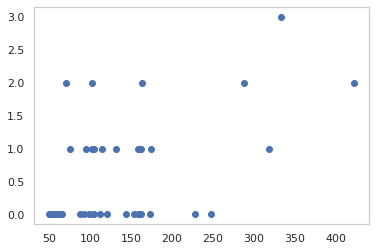

In [134]:
plt.scatter(df['n_pyr'],df.loc[:,('on',0.4,'switch_magnitude',0.3)])

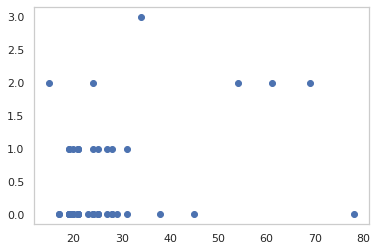

In [135]:
plt.scatter(df['n_trial'],df.loc[:,('on',0.4,'switch_magnitude',0.3)])

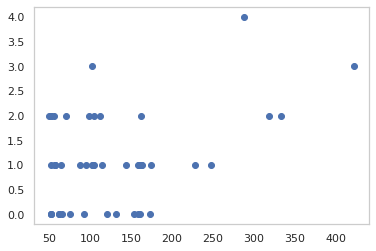

In [132]:
plt.scatter(df['n_pyr'],df.loc[:,('on',0.4,'switch_magnitude','raw')])

In [106]:
db_sorted_reind.loc[per_sess_sig_trial.index]['n_pyr_putative']

animal_name.1  sess_name      
e13_26m1       e13_26m1_210913    422
               e13_26m1_210913    422
e15_13f1       e15_13f1_220117    333
               e15_13f1_220117    333
               e15_13f1_220118    318
                                 ... 
e14_2m3        e14_2m3_201208      52
               e14_2m3_201206      52
               e14_2m3_201206      52
e16_1f1        e16_1f1_200923      50
               e16_1f1_200923      50
Name: n_pyr_putative, Length: 94, dtype: int64

In [230]:
df=switch_detection_res_allsess[detection]['sig_pos'].groupby(level=(0,1,4,5,6)).sum()

In [231]:
df

on                off        \
                                                   0  1  2  3  4  5   0  1  2   
e13_16f1 e13_16f1_210302 raw switch_magnitude 0.4  0  1  0  0  0  0   0  0  0   
                         0.3 switch_magnitude 0.4  0  1  0  0  0  0   0  0  0   
         e13_16f1_210312 raw switch_magnitude 0.4  0  1  0  0  0  0   0  0  0   
                         0.3 switch_magnitude 0.4  0  0  0  0  0  0   0  0  0   
         e13_16f1_210314 raw switch_magnitude 0.4  0  1  0  0  1  0   0  0  0   
...                                               .. .. .. .. .. ..  .. .. ..   
e16_3m2  e16_3m2_211211  0.3 switch_magnitude 0.4  0  0  0  0  0  0   0  0  0   
         e16_3m2_211212  raw switch_magnitude 0.4  0  1  0  0  0  0   0  0  0   
                         0.3 switch_magnitude 0.4  0  1  0  0  0  0   0  0  0   
         e16_3m2_211213  raw switch_magnitude 0.4  0  0  0  0  0  0   0  0  0   
                         0.3 switch_magnitude 0.4  0  0  0  0  1  1   0  0  1   

                                                            
                                                   3  4  5  
e13_16f1 e13_16f1_210302 raw switch_magnitude 0.4  0  0  0  
                         0.3 switch_magnitude 0.4  0  0  0  
         e13_16f1_210312 raw switch_magnitude 0.4  0  0  0  
                         0.3 switch_magnitude 0.4  0  0  0  
         e13_16f1_210314 raw switch_magnitude 0.4  0  0  0  
...                                               .. .. ..  
e16_3m2  e16_3m2_211211  0.3 switch_magnitude 0.4  0  0  0  
         e16_3m2_211212  raw switch_magnitude 0.4  0  0  0  
                         0.3 switch_magnitude 0.4  0  0  0  
         e16_3m2_211213  raw switch_magnitude 0.4  0  0  0  
                         0.3 switch_magnitude 0.4  0  0  0  

[94 rows x 12 columns]

In [237]:
switch_detection_res_allsess[detection]['sig_pos'].fillna(0).sum(axis=1).unstack(level=(-1,-2,-3))

0.4     
                             switch_magnitude     
                                          raw  0.3
e13_16f1 e13_16f1_210328 0 0              2.0  0.0
                           1              1.0  1.0
         e13_16f1_210331 0 0              0.0  1.0
                           1              1.0  1.0
         e13_16f1_210302 0 0              1.0  1.0
...                                       ...  ...
e16_3m2  e16_3m2_211212  0 1              2.0  1.0
         e16_3m2_211211  0 0              0.0  1.0
                           1              0.0  0.0
         e16_3m2_211210  0 0              0.0  1.0
                           1              1.0  0.0

[94 rows x 2 columns]

In [242]:
df=switch_detection_res_allsess[detection]['sig_pos'].fillna(0).groupby(axis=1,level=0).sum()

In [243]:
df

off  on
e13_26m1 e13_26m1_210913 0 0 raw switch_magnitude 0.4    1   1
                             0.3 switch_magnitude 0.4    1   1
                           1 raw switch_magnitude 0.4    1   2
                             0.3 switch_magnitude 0.4    0   1
e15_13f1 e15_13f1_220117 0 0 raw switch_magnitude 0.4    1   1
...                                                    ...  ..
e14_2m3  e14_2m3_201206  0 1 0.3 switch_magnitude 0.4    0   0
e16_1f1  e16_1f1_200923  0 0 raw switch_magnitude 0.4    1   1
                             0.3 switch_magnitude 0.4    0   0
                           1 raw switch_magnitude 0.4    0   1
                             0.3 switch_magnitude 0.4    0   0

[188 rows x 2 columns]

In [259]:
df=switch_detection_res_allsess[detection]['sig_pos'].fillna(0).groupby(axis=1,level=0).sum()
df=df.unstack(level=(-1,-2,-3))
# df['n_pyr'] = db_sorted.reset_index(drop=True).set_index(['animal_name.1','sess_name']).loc[df.index]['n_pyr_putative']



In [261]:
(df > 0).mean()

off  0.4  switch_magnitude  raw    0.297872
                            0.3    0.148936
on   0.4  switch_magnitude  raw    0.478723
                            0.3    0.212766
dtype: float64

In [248]:
df['n_pyr'] = df.index.map(lambda x:db_sorted_reind.loc[x[:2],'n_pyr_putative'])

In [254]:
ntrials_by_trialtype = switch_detection_res_allsess[detection]['sig_pos']['on'].groupby(level=(0,1,2,3)).apply(lambda x:x.droplevel((-1,-2,-3)).dropna(axis=1).shape[1])




In [256]:
df['n_trial'] = ntrials_by_trialtype